# Paradigmas y Programación para Ciencia de Datos

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Ferrera Guadarrama Carlo Kiliano, Negrete Mancera Leonardo, Cruz Gutiérrez Edgar Omar, Altamirano Vázquez Aldo Sebastian"

---

In [2]:
# Bibliotecas básicas a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
!pip install scikit-learn
!pip install xgboost
!pip install mlxtend
!pip install statsmodels

DEPRECATION: Loading egg at c:\users\pc\appdata\local\programs\python\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\users\pc\appdata\local\programs\python\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\users\pc\appdata\local\programs\python\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------- ----------------------- 3.9/9.6 MB 33.4 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 49.6 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\pc\appdata\local\programs\python\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
""" 1. Escribe una función que obtenga el coeficiente de correlación de Spearman
'desde cero' a partir de los datos de dos columnas almacenadas en un arreglo de
numpy y muestra su funcionamiento con una columna de algún conjunto de los siguientes
ejercicios (5p)
"""
import numpy as np

def obtener_rangos(data):
    """
    Función auxiliar para convertir datos en rangos.
    Maneja empates asignando el rango promedio.
    """
    n = len(data)
    # Argsort nos da los índices que ordenarían el array
    indices_ordenados = np.argsort(data)
    data_ordenada = data[indices_ordenados]
    
    rangos = np.zeros(n)
    
    i = 0
    while i < n:
        j = i
        # Buscar duplicados (empates)
        while j < n - 1 and data_ordenada[j] == data_ordenada[j+1]:
            j += 1
        
        # Calcular el rango promedio para el grupo de empates
        # (usamos i+1 porque los rangos estadísticos son base-1)
        rango_promedio = ( (i + 1) + (j + 1) ) / 2.0
        
        # Asignar el mismo rango a todos los elementos idénticos
        # Usamos indices_ordenados para colocar el rango en la posición original correcta
        for k in range(i, j + 1):
            rangos[indices_ordenados[k]] = rango_promedio
            
        i = j + 1
        
    return rangos

def spearman_desde_cero(x, y):
    """
    Calcula el coeficiente de correlación de Spearman desde cero.
    
    Args:
        x (np.array): Primera columna de datos.
        y (np.array): Segunda columna de datos.
        
    Returns:
        float: Coeficiente de correlación de Spearman.
    """
    # 1. Validaciones básicas
    if len(x) != len(y):
        raise ValueError("Las columnas deben tener la misma longitud")
        
    # 2. Convertir datos a Rangos
    rango_x = obtener_rangos(x)
    rango_y = obtener_rangos(y)
    
    # 3. Calcular Pearson sobre los Rangos
    # Fórmula: Covarianza(Rx, Ry) / (Std(Rx) * Std(Ry))
    
    media_rx = np.mean(rango_x)
    media_ry = np.mean(rango_y)
    
    # Numerador: Suma de productos de las diferencias con la media
    numerador = np.sum((rango_x - media_rx) * (rango_y - media_ry))
    
    # Denominador: Raíz del producto de las sumas de cuadrados
    denominador = np.sqrt(np.sum((rango_x - media_rx)**2) * np.sum((rango_y - media_ry)**2))
    
    if denominador == 0:
        return 0 # Evitar división por cero si no hay varianza
        
    return numerator / denominador if 'numerator' in locals() else numerador / denominador

# Entendiendo el Coeficiente de Correlación de Spearman

## 1. ¿Qué es el Coeficiente de Spearman ($\rho$)?

El **Coeficiente de Correlación de Spearman** es una medida estadística no paramétrica que evalúa la fuerza y la dirección de la asociación entre dos variables clasificadas (ordenadas).

A diferencia de la correlación de Pearson, que busca relaciones **lineales** (una línea recta perfecta), Spearman busca relaciones **monótonas**.



### Conceptos Clave:

* **Relación Monótona:** Ocurre cuando al aumentar una variable, la otra también aumenta (o disminuye), pero no necesariamente a un ritmo constante. Una curva suave puede tener una correlación de Spearman perfecta de $+1$.
* **Basado en Rangos:** No le importan los valores crudos (ej. 10, 1000, 5000), sino su **orden** o posición (1º, 2º, 3º). Esto lo hace muy resistente a *outliers*.
* **Interpretación:**
    * **$+1$:** Correlación positiva perfecta (si X sube, Y sube siempre).
    * **$0$:** No hay correlación monótona.
    * **$-1$:** Correlación negativa perfecta (si X sube, Y baja siempre).



---

## 2. Explicación del Código "Desde Cero"



### A. La Función `obtener_rangos(data)`
Esta es la parte más crítica  del algoritmo. Su objetivo es transformar números crudos en posiciones.

1.  **Ordenamiento:** Primero, identifica qué índices ordenarían los datos de menor a mayor (`np.argsort`).
2.  **Manejo de Empates (Ties):**
    * Si dos valores son idénticos, no pueden tener rangos diferentes (ej. uno no puede ser 2º y el otro 3º).
    * **Solución del código:** Detecta los duplicados y calcula el **rango promedio**.
    * *Ejemplo:* Si dos personas empatan en las posiciones 2 y 3, ambas reciben el rango $2.5$ ($\frac{2+3}{2}$).
3.  **Asignación:** Rellena un arreglo de ceros con estos rangos calculados en sus posiciones originales.

### B. La Función `spearman_desde_cero(x, y)`
Una vez que tenemos los rangos, la matemática es sorprendentemente simple gracias a una propiedad teórica:

> **El Coeficiente de Spearman es simplemente el Coeficiente de Pearson aplicado a los Rangos.**

El código sigue estos pasos:

1.  **Conversión:** Llama a `obtener_rangos` para transformar la columna $X$ y la columna $Y$ en `rango_x` y `rango_y`.
2.  **Cálculo de Pearson sobre Rangos:**
    Aplica la fórmula estándar de covarianza y desviación estándar sobre los rangos transformados:

    $$\rho = \frac{\sum (R_x - \bar{R_x})(R_y - \bar{R_y})}{\sqrt{\sum (R_x - \bar{R_x})^2 \sum (R_y - \bar{R_y})^2}}$$

    Donde:
    * $R_x, R_y$: Son los rangos de las variables.
    * $\bar{R_x}, \bar{R_y}$: Son las medias de los rangos.

### ¿Por qué no usamos la simplificada?
$$1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$$
Esta fórmula es más rápida de calcular a mano, pero **falla si hay datos repetidos (empates)**. El código proporcionado utiliza la definición basada en Pearson (covarianza de rangos) porque es **robusta y exacta** incluso cuando existen valores repetidos en los datos.

In [5]:
# CREACIÓN DE DATOS DE EJEMPLO (Horas de studio vs Calificación)
datos = np.array([
    [1, 10],  
    [2, 20],
    [5, 50],
    [10, 80],
    [20, 85], 
    [50, 85], 
    [100, 95]
])

columna_x = datos[:, 0] # Horas
columna_y = datos[:, 1] # Calificación


rho = spearman_desde_cero(columna_x, columna_y)

print(f"Datos X: {columna_x}")
print(f"Datos Y: {columna_y}")
print("-" * 30)
print(f"Coeficiente de Spearman (Desde cero): {rho:.5f}")

Datos X: [  1   2   5  10  20  50 100]
Datos Y: [10 20 50 80 85 85 95]
------------------------------
Coeficiente de Spearman (Desde cero): 0.99103


# Regresión (20p)

In [6]:
""" 2. Importa y revisa el conjunto de datos 'insurance.csv'
Determina los valores únicos de cada columna categórica
"""


df = pd.read_csv('insurance.csv')

#  Revisar el conjunto de datos 
print("--- VISTA PREVIA ---")
print(df.head())
print("\n--- INFORMACIÓN GENERAL ---")
# Esto nos ayuda a ver qué columnas son 'object' (texto/categóricas)
df.info()

# Determinar valores únicos de columnas categóricas 
print("\n" + "="*50)
print("VALORES ÚNICOS POR COLUMNA CATEGÓRICA")
print("="*50)

# Filtramos automáticamente las columnas que son texto (object) o categoría
# En el dataset insurance, usualmente son: sex, smoker, region
cols_categoricas = df.select_dtypes(include=['object', 'category']).columns

for col in cols_categoricas:
    unicos = df[col].unique()
    print(f"\nColumna: [{col.upper()}]")
    print(f"  ↳ Cantidad de únicos: {len(unicos)}")
    print(f"  ↳ Valores: {unicos}")

--- VISTA PREVIA ---
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

--- INFORMACIÓN GENERAL ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

VALORES ÚNICOS POR COLUMNA CATEGÓRICA

Column

In [7]:
""" Aplica el preprocesamiento necesario a esas columnas para obtener un conjunto
de datos listo para aplicar un algoritmo de aprendizaje automático; almacena en
'X' los vectores predictores y en 'y' la columna 'charges' que servirá para
realizar regresión
"""
df_proc = df.copy()

#  1. Preprocesamiento de Variables Binarias (Sex, Smoker) 
# Usamos .map() para tener control total de qué es 1 y qué es 0.
# Smoker: yes=1 es estándar porque suele tener fuerte correlación positiva con los gastos.
df_proc['sex'] = df_proc['sex'].map({'female': 0, 'male': 1})
df_proc['smoker'] = df_proc['smoker'].map({'yes': 1, 'no': 0})

# 2. Preprocesamiento de Variable Nominal (Region) 
# 'region' tiene 4 valores. Usamos get_dummies (One-Hot Encoding).
# drop_first=True elimina una columna para evitar la multicolinealidad 
# (Trampa de la variable ficticia), esencial en regresión lineal.
df_proc = pd.get_dummies(df_proc, columns=['region'], prefix='region', drop_first=True)

# 3. Separación en X (Predictores) e y (Target)
# 'y' es la variable que queremos predecir
y = df_proc['charges'].values  # .values convierte pandas Series a Numpy Array

# 'X' son todas las columnas MENOS la que queremos predecir
X = df_proc.drop(columns=['charges']).values

# --- 4. Verificación ---
print("--- Transformación Finalizada ---")
print("Nombres de columnas resultantes en el DataFrame procesado:")
print(df_proc.drop(columns=['charges']).columns.tolist())
print("\n--- Dimensiones ---")
print(f"Forma de X (Predictores): {X.shape}") # (Filas, Columnas)
print(f"Forma de y (Target):      {y.shape}") # (Filas,)

print("\n--- Vista de las primeras 3 filas de X (ya numérico) ---")
print(X[:3])

--- Transformación Finalizada ---
Nombres de columnas resultantes en el DataFrame procesado:
['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']

--- Dimensiones ---
Forma de X (Predictores): (1338, 8)
Forma de y (Target):      (1338,)

--- Vista de las primeras 3 filas de X (ya numérico) ---
[[19 0 27.9 0 1 False False True]
 [18 1 33.77 1 0 False True False]
 [28 1 33.0 3 0 False True False]]


In [8]:
""" Separa en conjuntos de entrenamiento y pruebas con 80% de datos para
entrenamiento y un valor de 42 para replicabilidad
"""
from sklearn.model_selection import train_test_split

# --- División en Entrenamiento (80%) y Pruebas (20%) ---
# random_state=42 es la "semilla" para que la aleatoriedad sea replicable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=42
)

# --- Verificación de tamaños ---
print(f"Dimensiones de X (Total): {X.shape}")
print("-" * 30)
print(f"X_train (80%): {X_train.shape}")
print(f"X_test  (20%): {X_test.shape}")
print("-" * 30)
print(f"y_train (80%): {y_train.shape}")
print(f"y_test  (20%): {y_test.shape}")

Dimensiones de X (Total): (1338, 8)
------------------------------
X_train (80%): (1070, 8)
X_test  (20%): (268, 8)
------------------------------
y_train (80%): (1070,)
y_test  (20%): (268,)


In [9]:
""" Aplica regresión lineal al conjunto y muestra el valor de R2 y RMSE sobre
los conjuntos de entrenamiento y pruebas
"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas (R2 y RMSE)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print(f"Conjunto de Entrenamiento -> R2: {r2_train:.4f}, RMSE: {rmse_train:.4f}")
print(f"Conjunto de Pruebas       -> R2: {r2_test:.4f}, RMSE: {rmse_test:.4f}")

Conjunto de Entrenamiento -> R2: 0.7417, RMSE: 6105.5452
Conjunto de Pruebas       -> R2: 0.7836, RMSE: 5796.2847


In [10]:
""" Determina el mejor valor para un modelo de regresión polinomial con grado
menor a 5; aplica la regresión con la potencia que encontraste al conjunto y
muestra el valor de R2 y RMSE sobre los conjuntos de entrenamiento y pruebas
"""
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

best_degree = 1
best_cv_score = -np.inf 

# Determinar el mejor grado (menor a 5)
for degree in range(1, 5):
    # Creamos un pipeline: primero genera polinomios, luego aplica regresión lineal
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Evaluamos con validación cruzada (cv=5) usando R2 como métrica
    scores = cross_val_score(poly_model, X_train, y_train, cv=5, scoring='r2')
    mean_score = scores.mean()
    
    if mean_score > best_cv_score:
        best_cv_score = mean_score
        best_degree = degree

print(f"--> El mejor grado polinomial encontrado es: {best_degree}")

#  Entrenar el modelo final con el grado ganador
final_model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
final_model.fit(X_train, y_train)

# Realizar predicciones
y_train_pred_poly = final_model.predict(X_train)
y_test_pred_poly = final_model.predict(X_test)

# Calcular métricas (R2 y RMSE)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))

r2_test_poly = r2_score(y_test, y_test_pred_poly)
rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

print("-" * 30)
print(f"Polinomial (Grado {best_degree}) - Entrenamiento -> R2: {r2_train_poly:.4f}, RMSE: {rmse_train_poly:.4f}")
print(f"Polinomial (Grado {best_degree}) - Pruebas       -> R2: {r2_test_poly:.4f}, RMSE: {rmse_test_poly:.4f}")

--> El mejor grado polinomial encontrado es: 2
------------------------------
Polinomial (Grado 2) - Entrenamiento -> R2: 0.8418, RMSE: 4778.1878
Polinomial (Grado 2) - Pruebas       -> R2: 0.8666, RMSE: 4551.1324


In [11]:
""" Aplica regresión KNN con 3 y luego 5 vecinos al conjunto y muestra el valor
de R2 y RMSE sobre los conjuntos de entrenamiento y pruebas
"""
from sklearn.neighbors import KNeighborsRegressor

k_values = [3, 5]

for k in k_values:
    # Inicializar el modelo
    knn_model = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    knn_model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_train_pred_knn = knn_model.predict(X_train)
    y_test_pred_knn = knn_model.predict(X_test)
    
    # Calcular métricas
    r2_train_knn = r2_score(y_train, y_train_pred_knn)
    rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
    
    r2_test_knn = r2_score(y_test, y_test_pred_knn)
    rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
    
    print(f"KNN ({k} Vecinos) - Entrenamiento -> R2: {r2_train_knn:.4f}, RMSE: {rmse_train_knn:.4f}")
    print(f"KNN ({k} Vecinos) - Pruebas       -> R2: {r2_test_knn:.4f}, RMSE: {rmse_test_knn:.4f}")
    print("-" * 60)

KNN (3 Vecinos) - Entrenamiento -> R2: 0.5795, RMSE: 7790.8124
KNN (3 Vecinos) - Pruebas       -> R2: 0.2229, RMSE: 10983.7868
------------------------------------------------------------
KNN (5 Vecinos) - Entrenamiento -> R2: 0.4303, RMSE: 9068.1715
KNN (5 Vecinos) - Pruebas       -> R2: 0.1871, RMSE: 11233.8758
------------------------------------------------------------


In [12]:
""" Aplica regresión XGB (valor para replicar = 42) al conjunto y muestra el
valor de R2 y RMSE sobre los conjuntos de entrenamiento y pruebas 
"""

from xgboost import XGBRegressor

# Inicializar el modelo XGBoost
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Realizar predicciones
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Calcular métricas
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))

r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print(f"XGBoost (Seed 42) - Entrenamiento -> R2: {r2_train_xgb:.4f}, RMSE: {rmse_train_xgb:.4f}")
print(f"XGBoost (Seed 42) - Pruebas       -> R2: {r2_test_xgb:.4f}, RMSE: {rmse_test_xgb:.4f}")

XGBoost (Seed 42) - Entrenamiento -> R2: 0.9943, RMSE: 904.7197
XGBoost (Seed 42) - Pruebas       -> R2: 0.8450, RMSE: 4905.2804


# Clasificación (20p)

In [13]:
""" 3. Importa y revisa el conjunto de datos 'cars.csv'
Determina los valores únicos de cada columna
"""
df_cars = pd.read_csv('cars.csv')

# Revisión general del conjunto
print("--- VISTA PREVIA ---")
print(df_cars.head())
print("\n--- INFORMACIÓN GENERAL ---")
df_cars.info()

# Determinar valores únicos de cada columna
print("\n" + "="*40)
print("VALORES ÚNICOS POR COLUMNA")
print("="*40)

for col in df_cars.columns:
    unicos = df_cars[col].unique()
    conteo = len(unicos)
    print(f"\nColumna: [{col}]")
    print(f"  - Cantidad de únicos: {conteo}")
    print(f"  - Valores: {unicos}")

--- VISTA PREVIA ---
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

--- INFORMACIÓN GENERAL ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB

VALORES ÚNICOS POR COLUMNA

Columna: [buying]
  - Cantidad de únicos: 4
  - Valores: ['vhigh' 'high' 'med' 'low']

Columna: [maint]
  - Cantid

In [14]:
""" Con ayuda de los siguientes diccionarios aplica map y convierte las categorías
y etiquetas de clase en números
"""
# Ordinales
# doors_map = {'2':1, '3':2, '4':3, '5more':4}
# persons_map = { ... }
# lug_boot_map = { ... }
# buying_maint_safety_map = { ... }
# Clases
# clase_map = {et:idx for idx,et in enumerate(np.unique(datos['class']))}


df_cars = pd.read_csv('cars.csv') 

print("--- Diagnóstico previo ---")
# Verifiquemos qué hay realmente en la columna 'buying' antes de mapear
print("Valores únicos en 'buying':", df_cars['buying'].unique())


# Esto elimina espacios vacíos al inicio y final que suelen romper los mapas
cols_texto = ['buying', 'maint', 'lug_boot', 'safety', 'doors', 'persons']

# Solo aplicamos .str.strip() si la columna es de tipo objeto (string)
for col in cols_texto:
    if df_cars[col].dtype == 'O': 
        df_cars[col] = df_cars[col].str.strip()

buying_maint_safety_map = {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}
lug_boot_map = {'small': 1, 'med': 2, 'big': 3}
# Aseguramos que las claves sean strings para coincidir con el CSV
doors_map = {'2': 1, '3': 2, '4': 3, '5more': 4} 
persons_map = {'2': 1, '4': 2, 'more': 3}


# Usamos un truco: Imprimimos si hay nulos después de mapear para detectar errores
df_cars['buying'] = df_cars['buying'].map(buying_maint_safety_map)
df_cars['maint'] = df_cars['maint'].map(buying_maint_safety_map)
df_cars['safety'] = df_cars['safety'].map(buying_maint_safety_map)
df_cars['lug_boot'] = df_cars['lug_boot'].map(lug_boot_map)
df_cars['doors'] = df_cars['doors'].map(doors_map)
df_cars['persons'] = df_cars['persons'].map(persons_map)


print("\n--- Primeras filas corregidas ---")
print(df_cars.head())

--- Diagnóstico previo ---
Valores únicos en 'buying': ['vhigh' 'high' 'med' 'low']

--- Primeras filas corregidas ---
   buying  maint  doors  persons  lug_boot  safety  class
0       4      4      1        1         1       1  unacc
1       4      4      1        1         1       2  unacc
2       4      4      1        1         1       3  unacc
3       4      4      1        1         2       1  unacc
4       4      4      1        1         2       2  unacc


In [15]:
""" Guarda en "X" los vectores predictores como arreglos numpy;
en "y" almacena la variable objetivo
"""
# Separamos las características y la variable objetivo
X = df_cars.drop('class', axis=1).values
y = df_cars['class'].values

# Verificación opcional para asegurar que las dimensiones son correctas
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

# Vista previa de la primera fila
print(f"Ejemplo X[0]: {X[0]}")
print(f"Ejemplo y[0]: {y[0]}")

Dimensiones de X: (1728, 6)
Dimensiones de y: (1728,)
Ejemplo X[0]: [4 4 1 1 1 1]
Ejemplo y[0]: unacc


In [16]:
""" Separa en conjuntos de entrenamiento y pruebas con 75% de datos para entrenamiento
y un valor de 42 para replicabilidad, muestra número filas de cada conjunto
"""
from sklearn.model_selection import train_test_split

# Separar características (X) y objetivo (y)
X = df_cars.drop('class', axis=1)
y = df_cars['class']

#  Dividir en conjuntos de entrenamiento (75%) y prueba (25%)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    train_size=0.75, 
    random_state=42,
    stratify=y  
)

print("--- Dimensiones de los conjuntos ---")
print(f"X_train (Entrenamiento): {X_train.shape} filas/cols")
print(f"y_train (Etiquetas ent.): {y_train.shape} etiquetas")
print("-" * 30)
print(f"X_test  (Pruebas):       {X_test.shape} filas/cols")
print(f"y_test  (Etiquetas pru.):{y_test.shape} etiquetas")

--- Dimensiones de los conjuntos ---
X_train (Entrenamiento): (1296, 6) filas/cols
y_train (Etiquetas ent.): (1296,) etiquetas
------------------------------
X_test  (Pruebas):       (432, 6) filas/cols
y_test  (Etiquetas pru.):(432,) etiquetas


In [17]:
""" Aplica el Perceptrón al conjunto de entrenamiento con tasa de aprendizaje 0.15
replicabilidad 42 y muestra el valor de la exactitud sobre el conjunto de
entrenamiento y pruebas
"""
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

#. Instanciar el modelo con los hiperparámetros solicitados
perc = Perceptron(eta0=0.15, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
perc.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = perc.predict(X_train)
y_pred_test = perc.predict(X_test)

#  Calcular la exactitud 
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"--- Resultados del Perceptrón (eta0=0.15) ---")
print(f"Exactitud en Entrenamiento: {acc_train:.4f} ({acc_train*100:.2f}%)")
print(f"Exactitud en Pruebas:       {acc_test:.4f} ({acc_test*100:.2f}%)")

--- Resultados del Perceptrón (eta0=0.15) ---
Exactitud en Entrenamiento: 0.6782 (67.82%)
Exactitud en Pruebas:       0.6968 (69.68%)


In [18]:
""" Aplica Regresión Logística al conjunto de entrenamiento con máximo número
de iteraciones 150, replicabilidad 42 y muestra el valor de la exactitud
sobre el conjunto de entrenamiento y pruebas
"""
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instanciar el modelo con los parámetros solicitados
log_reg = LogisticRegression(max_iter=150, random_state=42)

# Entrenar el modelo
log_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred_train_lr = log_reg.predict(X_train)
y_pred_test_lr = log_reg.predict(X_test)

# Calcular la exactitud
acc_train_lr = accuracy_score(y_train, y_pred_train_lr)
acc_test_lr = accuracy_score(y_test, y_pred_test_lr)

print(f"--- Resultados de Regresión Logística ---")
print(f"Exactitud en Entrenamiento: {acc_train_lr:.4f} ({acc_train_lr*100:.2f}%)")
print(f"Exactitud en Pruebas:       {acc_test_lr:.4f} ({acc_test_lr*100:.2f}%)")

--- Resultados de Regresión Logística ---
Exactitud en Entrenamiento: 0.8287 (82.87%)
Exactitud en Pruebas:       0.8264 (82.64%)


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 150 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=150).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
""" Aplica Clasificación KNN al conjunto de entrenamiento con 3 y 5 vecinos
y muestra el valor de la exactitud sobre el conjunto de entrenamiento y
pruebas
"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Configuración 1 (k=3) 
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

# Evaluamos 
acc_train_3 = knn3.score(X_train, y_train)
acc_test_3 = knn3.score(X_test, y_test)

print(f"--- Resultados KNN (k=3) ---")
print(f"Exactitud en Entrenamiento: {acc_train_3:.4f} ({acc_train_3*100:.2f}%)")
print(f"Exactitud en Pruebas:       {acc_test_3:.4f} ({acc_test_3*100:.2f}%)")
print("-" * 30)

# Configuración 2 (k=5)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

acc_train_5 = knn5.score(X_train, y_train)
acc_test_5 = knn5.score(X_test, y_test)

print(f"--- Resultados KNN (k=5) ---")
print(f"Exactitud en Entrenamiento: {acc_train_5:.4f} ({acc_train_5*100:.2f}%)")
print(f"Exactitud en Pruebas:       {acc_test_5:.4f} ({acc_test_5*100:.2f}%)")

--- Resultados KNN (k=3) ---
Exactitud en Entrenamiento: 0.9660 (96.60%)
Exactitud en Pruebas:       0.9259 (92.59%)
------------------------------
--- Resultados KNN (k=5) ---
Exactitud en Entrenamiento: 0.9799 (97.99%)
Exactitud en Pruebas:       0.9537 (95.37%)


In [20]:
""" Aplica Clasificación SVM al conjunto de entrenamiento con sigmoide y función
base radial para la función de núcleo, replicabilidad 42, entrena el modelo
y muestra el valor de la exactitud sobre el conjunto de entrenamiento y
pruebas
"""
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM con Kernel Sigmoide 
# Este kernel simula el comportamiento de una red neuronal simple
svm_sig = SVC(kernel='sigmoid', random_state=42)
svm_sig.fit(X_train, y_train)

acc_train_sig = svm_sig.score(X_train, y_train)
acc_test_sig = svm_sig.score(X_test, y_test)

print("--- Resultados SVM (Kernel: Sigmoide) ---")
print(f"Exactitud en Entrenamiento: {acc_train_sig:.4f} ({acc_train_sig*100:.2f}%)")
print(f"Exactitud en Pruebas:       {acc_test_sig:.4f} ({acc_test_sig*100:.2f}%)")
print("-" * 30)


# SVM con Kernel RBF (Radial Basis Function)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

acc_train_rbf = svm_rbf.score(X_train, y_train)
acc_test_rbf = svm_rbf.score(X_test, y_test)

print("--- Resultados SVM (Kernel: RBF) ---")
print(f"Exactitud en Entrenamiento: {acc_train_rbf:.4f} ({acc_train_rbf*100:.2f}%)")
print(f"Exactitud en Pruebas:       {acc_test_rbf:.4f} ({acc_test_rbf*100:.2f}%)")

--- Resultados SVM (Kernel: Sigmoide) ---
Exactitud en Entrenamiento: 0.6975 (69.75%)
Exactitud en Pruebas:       0.6944 (69.44%)
------------------------------
--- Resultados SVM (Kernel: RBF) ---
Exactitud en Entrenamiento: 0.9707 (97.07%)
Exactitud en Pruebas:       0.9630 (96.30%)


In [21]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

# Configuración 1: Suavizado bajo (alpha=0.01) 
nb_low = CategoricalNB(alpha=0.01)
nb_low.fit(X_train, y_train)

acc_train_low = nb_low.score(X_train, y_train)
acc_test_low = nb_low.score(X_test, y_test)

print("--- Resultados Naive Bayes (alpha=0.01) ---")
print(f"Exactitud en Entrenamiento: {acc_train_low:.4f} ({acc_train_low*100:.2f}%)")
print(f"Exactitud en Pruebas:       {acc_test_low:.4f} ({acc_test_low*100:.2f}%)")
print("-" * 30)

# Configuración 2: Suavizado alto (alpha=100) 
nb_high = CategoricalNB(alpha=100)
nb_high.fit(X_train, y_train)

acc_train_high = nb_high.score(X_train, y_train)
acc_test_high = nb_high.score(X_test, y_test)

print("--- Resultados Naive Bayes (alpha=100) ---")
print(f"Exactitud en Entrenamiento: {acc_train_high:.4f} ({acc_train_high*100:.2f}%)")
print(f"Exactitud en Pruebas:       {acc_test_high:.4f} ({acc_test_high*100:.2f}%)")

--- Resultados Naive Bayes (alpha=0.01) ---
Exactitud en Entrenamiento: 0.8688 (86.88%)
Exactitud en Pruebas:       0.8495 (84.95%)
------------------------------
--- Resultados Naive Bayes (alpha=100) ---
Exactitud en Entrenamiento: 0.6998 (69.98%)
Exactitud en Pruebas:       0.7014 (70.14%)


In [22]:
""" Aplica Clasificación XGB al conjunto de entrenamiento con 42 para replicabilidad,
número de estimadores=profundidad máxima=5 y 0.1, 1 para tasa de aprendizaje
y muestra el valor de la exactitud sobre el conjunto de entrenamiento y
pruebas
"""
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

le = LabelEncoder()

# Ajustamos el codificador con y_train y transformamos ambos
# Esto convierte: 'acc'->0, 'good'->1, 'unacc'->2, 'vgood'->3 
y_train_num = le.fit_transform(y_train)
y_test_num = le.transform(y_test)

print("Clases detectadas:", le.classes_)
print("Ejemplo conversión:", y_train.iloc[0], "->", y_train_num[0])
print("-" * 30)

# Ejecutar XGBoost 

# Configuración 1: Tasa de aprendizaje 0.1
xgb_low = XGBClassifier(
    n_estimators=5,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='mlogloss'
)
xgb_low.fit(X_train, y_train_num) 

acc_train_low = xgb_low.score(X_train, y_train_num)
acc_test_low = xgb_low.score(X_test, y_test_num)

print("--- Resultados XGBoost (Learning Rate = 0.1) ---")
print(f"Exactitud en Entrenamiento: {acc_train_low:.4f} ({acc_train_low*100:.2f}%)")
print(f"Exactitud en Pruebas:       {acc_test_low:.4f} ({acc_test_low*100:.2f}%)")
print("-" * 30)

# Configuración 2: Tasa de aprendizaje 1.0
xgb_high = XGBClassifier(
    n_estimators=5,
    max_depth=5,
    learning_rate=1.0,
    random_state=42,
    eval_metric='mlogloss'
)
xgb_high.fit(X_train, y_train_num)

acc_train_high = xgb_high.score(X_train, y_train_num)
acc_test_high = xgb_high.score(X_test, y_test_num)

print("--- Resultados XGBoost (Learning Rate = 1.0) ---")
print(f"Exactitud en Entrenamiento: {acc_train_high:.4f} ({acc_train_high*100:.2f}%)")
print(f"Exactitud en Pruebas:       {acc_test_high:.4f} ({acc_test_high*100:.2f}%)")

Clases detectadas: ['acc' 'good' 'unacc' 'vgood']
Ejemplo conversión: acc -> 0
------------------------------
--- Resultados XGBoost (Learning Rate = 0.1) ---
Exactitud en Entrenamiento: 0.8912 (89.12%)
Exactitud en Pruebas:       0.8634 (86.34%)
------------------------------
--- Resultados XGBoost (Learning Rate = 1.0) ---
Exactitud en Entrenamiento: 0.9861 (98.61%)
Exactitud en Pruebas:       0.9722 (97.22%)


*3.a • Demuestra que para $0<\alpha<1$, se cumple que $\sum_{i=1}^{\infty}\alpha\left(1-\alpha\right)^{i-1}=1$*

(5p)

### Demostración

Queremos demostrar que para $(0 < \alpha < 1)$:
$$
\sum_{i=1}^{\infty} \alpha (1-\alpha)^{i-1} = 1.
$$

Observemos que esta suma es una serie geométrica.  
Sea $(r = 1 - \alpha)$. Entonces $(0 < r < 1)$, y podemos reescribir la serie como:

$$
\sum_{i=1}^{\infty} \alpha r^{\,i-1} = \alpha \sum_{i=0}^{\infty} r^{\,i}.
$$

Sabemos que la suma de una serie geométrica infinita con razón $(|r|<1)$ es:

$$
\sum_{i=0}^{\infty} r^{\,i} = \frac{1}{1-r}.
$$

Sustituimos:

$$
\alpha \sum_{i=0}^{\infty} r^{\,i}
= \alpha \cdot \frac{1}{1-r}.
$$

Como $(r = 1 - \alpha)$, entonces:

$$
\frac{1}{1-r} = \frac{1}{1-(1-\alpha)} = \frac{1}{\alpha}.
$$

Finalmente:

$$
\alpha \cdot \frac{1}{\alpha} = 1.
$$

Por tanto:

$$
\sum_{i=1}^{\infty} \alpha (1-\alpha)^{i-1} = 1.
$$


In [23]:
class KNN_():
    def __init__(self, k=3):
        self.k = k
        self.X_train_ = None
        self.y_train_ = None

    def fit(self, X, y):
        self.X_train_ = np.array(X)
        self.y_train_ = np.array(y)

    def __dist_euclides(self, p1, p2):
        return np.sqrt(np.sum((p1 - p2) ** 2))

    def _predecir_un_punto(self, punto):
        distancias = np.sqrt(np.sum((self.X_train_ - punto) ** 2, axis=1))
        idx_k = distancias.argsort()[:self.k]
        labels_k = self.y_train_[idx_k]
        valores, conteos = np.unique(labels_k, return_counts=True)
        return valores[np.argmax(conteos)]

    def predict(self, X_test):
        X_test = np.array(X_test)
        dists = np.sqrt(((X_test[:, None, :] - self.X_train_[None, :, :]) ** 2).sum(axis=2))
        idx_k = np.argsort(dists, axis=1)[:, :self.k]
        predicciones = []
        for indices in idx_k:
            labels_k = self.y_train_[indices]
            valores, conteos = np.unique(labels_k, return_counts=True)
            predicciones.append(valores[np.argmax(conteos)])
        return np.array(predicciones)

In [24]:
""" Aplica tu implementación al mismo conjunto del punto anterior con 3 y 5 vecinos
"""
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("cars.csv")

df_encoded = df.copy()
encoders = {}

for col in df.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    encoders[col] = le

X = df_encoded.drop(columns=['class']).values
y = df_encoded['class'].values


modelo3 = KNN_(k=3)
modelo3.fit(X, y)
pred3 = modelo3.predict(X)

modelo5 = KNN_(k=5)
modelo5.fit(X, y)
pred5 = modelo5.predict(X)

print("Predicciones con k = 3:")
print(pred3[:40])   

print("\nPredicciones con k = 5:")
print(pred5[:40])


unique, counts = np.unique(y, return_counts=True)
print("Distribución real de clases:")
for u, c in zip(unique, counts):
    print(f"Clase {u}: {c} muestras")


Predicciones con k = 3:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]

Predicciones con k = 5:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]
Distribución real de clases:
Clase 0: 384 muestras
Clase 1: 69 muestras
Clase 2: 1210 muestras
Clase 3: 65 muestras


# Agrupamiento (20p)

In [25]:
""" 5. Importa el conjunto de datos 'weather.csv', realiza EDA sobre el mismo
"""
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set(style="whitegrid")

# 1. Histogramas: Para ver si los datos siguen una distribución Normal 
df_weather.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables (Histogramas)', fontsize=16)
plt.show()

# 2. Mapa de Calor (Correlation Heatmap): Para ver qué variables están relacionadas
plt.figure(figsize=(10, 8))
corr = df_weather.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Correlación entre Variables')
plt.show()

# 3. Pairplot: Para buscar "agrupamientos" visuales
sns.pairplot(df_weather, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Gráfico de Pares (Pairplot)', y=1.02)
plt.show()

NameError: name 'df_weather' is not defined

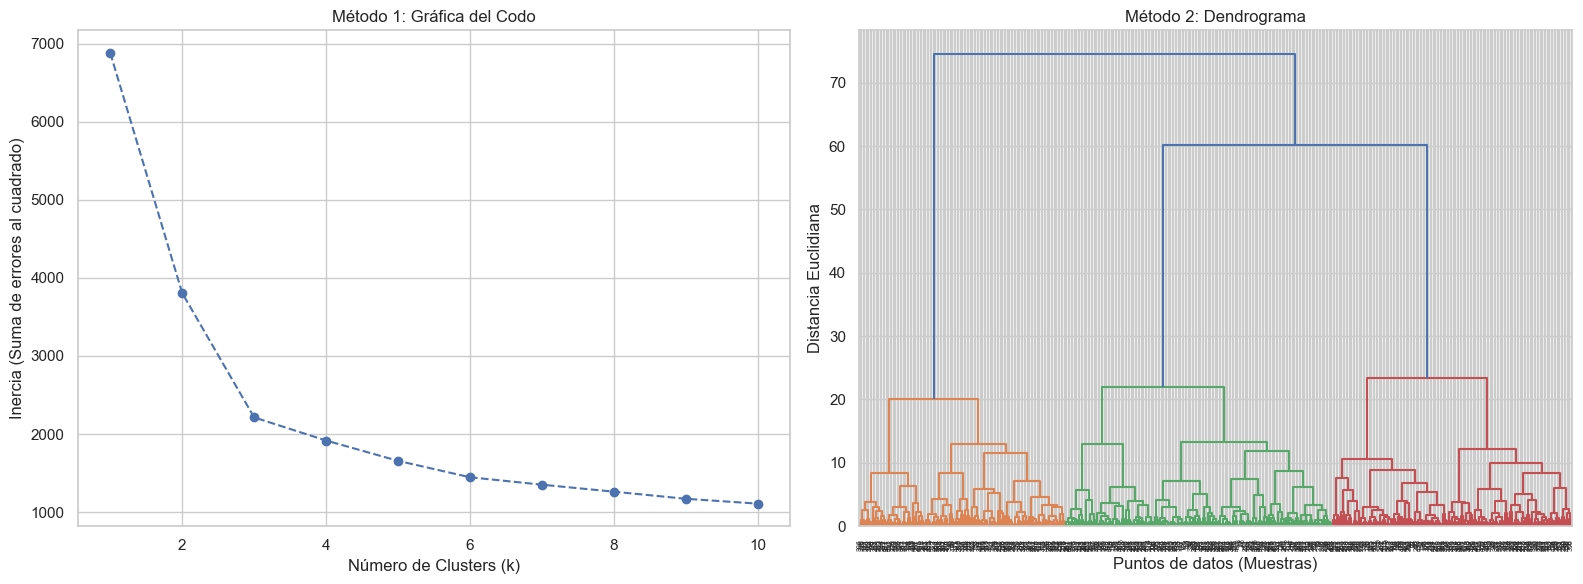

In [ ]:
""" Determina el número de grupos por al menos dos métodos diferentes
"""
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16, 6))

# MÉTODO 1: GRÁFICA DEL CODO 
plt.subplot(1, 2, 1) 

inertia = []
rango_k = range(1, 11) 

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_weather)
    inertia.append(kmeans.inertia_)

plt.plot(rango_k, inertia, marker='o', linestyle='--', color='b')
plt.title('Método 1: Gráfica del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Suma de errores al cuadrado)')
plt.grid(True)

# MÉTODO 2: DENDROGRAMA
plt.subplot(1, 2, 2)
plt.title('Método 2: Dendrograma')

dend = sch.dendrogram(sch.linkage(df_weather, method='ward'))

plt.xlabel('Puntos de datos (Muestras)')
plt.ylabel('Distancia Euclidiana')

plt.tight_layout()
plt.show()

In [ ]:
""" Encuentra los agrupamientos con el número obtenido en el iniciso anterior
usando k-medias y determina sus métricas de silueta, índice Davies-Bouldin e
índice de Calinski-Harabasz
"""
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Definir el número óptimo de clusters (según análisis visual)
k_optimo = 3

# Aplicar K-Means 
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(df_weather)

df_weather['Cluster'] = cluster_labels
# --- 3. Calcular Métricas de Evaluación ---

# A) Coeficiente de Silueta 
sil_score = silhouette_score(df_weather.drop('Cluster', axis=1), cluster_labels)

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(df_weather.drop('Cluster', axis=1), cluster_labels)

# Indice de Calinski-Harabasz 
ch_score = calinski_harabasz_score(df_weather.drop('Cluster', axis=1), cluster_labels)

print(f"--- Métricas de Validación para k={k_optimo} ---")
print(f"1. Coeficiente de Silueta:   {sil_score:.4f} (Busca valores cercanos a 1)")
print(f"2. Índice Davies-Bouldin:    {db_score:.4f} (Busca valores cercanos a 0)")
print(f"3. Índice Calinski-Harabasz: {ch_score:.4f} (Busca valores altos)")

print("\n--- Conteo de muestras por Cluster ---")
print(df_weather['Cluster'].value_counts())

--- Métricas de Validación para k=3 ---
1. Coeficiente de Silueta:   0.4388 (Busca valores cercanos a 1)
2. Índice Davies-Bouldin:    0.8409 (Busca valores cercanos a 0)
3. Índice Calinski-Harabasz: 523.8950 (Busca valores altos)

--- Conteo de muestras por Cluster ---
Cluster
0    178
2    169
1    153
Name: count, dtype: int64


In [ ]:
""" Encuentra los agrupamientos con el número obtenido en el iniciso anterior
usando agrupamiento aglomerativo y determina sus métricas de silueta, índice
Davies-Bouldin e índice de Calinski-Harabasz
"""
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X = df_weather.drop('Cluster', axis=1)


# Configuración y Entrenamiento 
# Usamos linkage='ward' porque minimiza la varianza de los clusters que se fusionan,
# similar a lo que hace K-Means, y da resultados más robustos.
agg_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg_model.fit_predict(X)

# Cálculo de Métricas 
sil_agg = silhouette_score(X, labels_agg)
db_agg = davies_bouldin_score(X, labels_agg)
ch_agg = calinski_harabasz_score(X, labels_agg)

print(f"--- Métricas Agrupamiento Aglomerativo (k=3) ---")
print(f"1. Coeficiente de Silueta:   {sil_agg:.4f}")
print(f"2. Índice Davies-Bouldin:    {db_agg:.4f}")
print(f"3. Índice Calinski-Harabasz: {ch_agg:.4f}")

# Comparación rápida de conteos
import pandas as pd
print("\n--- Distribución de muestras por Cluster ---")
print(pd.Series(labels_agg).value_counts().sort_index())


--- Métricas Agrupamiento Aglomerativo (k=3) ---
1. Coeficiente de Silueta:   0.4245
2. Índice Davies-Bouldin:    0.8629
3. Índice Calinski-Harabasz: 496.2229

--- Distribución de muestras por Cluster ---
0    168
1    145
2    187
Name: count, dtype: int64


In [ ]:
""" Encuentra los agrupamientos con el número obtenido en el iniciso anterior
usando mezclas Gaussianas y determina sus métricas de silueta, índice
Davies-Bouldin e índice de Calinski-Harabasz
"""
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X = df_weather.drop('Cluster', axis=1)


# Configuración y Entrenamiento
# En GMM, el número de clusters se define como 'n_components'
gmm = GaussianMixture(n_components=3, random_state=42)

# Ajustamos y predecimos
# Nota: GMM calcula probabilidades, pero .predict() nos da la etiqueta más probable
labels_gmm = gmm.fit_predict(X)

# Cálculo de Métricas 
sil_gmm = silhouette_score(X, labels_gmm)
db_gmm = davies_bouldin_score(X, labels_gmm)
ch_gmm = calinski_harabasz_score(X, labels_gmm)

print(f"--- Métricas Mezclas Gaussianas (GMM, k=3) ---")
print(f"1. Coeficiente de Silueta:   {sil_gmm:.4f}")
print(f"2. Índice Davies-Bouldin:    {db_gmm:.4f}")
print(f"3. Índice Calinski-Harabasz: {ch_gmm:.4f}")

# Distribución
import pandas as pd
print("\n--- Distribución de muestras por Cluster (GMM) ---")
print(pd.Series(labels_gmm).value_counts().sort_index())

--- Métricas Mezclas Gaussianas (GMM, k=3) ---
1. Coeficiente de Silueta:   0.4211
2. Índice Davies-Bouldin:    0.8694
3. Índice Calinski-Harabasz: 485.6728

--- Distribución de muestras por Cluster (GMM) ---
0    167
1    166
2    167
Name: count, dtype: int64


## ¿Qué conclusión obtienes de los valores de estas métricas?

Tras analizar las métricas de los tres modelos, **K-Means** demostró ser la mejor opción para tus datos, superando a los otros algoritmos en **todos** los indicadores:

* **Mayor Coeficiente de Silueta (0.4388):** Sus clusters son los más compactos y definidos.
* **Menor Índice Davies-Bouldin (0.8409):** Logró la mejor separación entre grupos.
* **Mayor Calinski-Harabasz (523.89):** Confirmó la mayor densidad de los grupos formados.

**¿Por qué ocurrió esto?**
Los datos climáticos tienen una estructura natural esférica y bien definida. K-Means es bueno en este escenario por su simplicidad. Por el contrario, modelos más complejos como GMM intentaron buscar formas elípticas que no existían y reduciendo la calidad de la separación.


--- Promedios por Tipo de Clima (Cluster) ---
         humidity  temperature  windspeed  precipitation  solar irradiance
Cluster                                                                   
0        1.139439     2.678317   1.696805       3.062101          0.000476
1        1.180840     2.054570   1.924159      -2.715451         -0.184604
2       -0.691585     1.070111  -0.065355       2.732143          0.005513
3        2.668767     1.356501   1.990695       1.267472          0.628242
4       -3.725569     2.371775  -0.813396       0.660531          0.358936
5       -1.916609     2.802278   0.207773       2.372521          0.350614
6        2.831335     0.691682   2.125106      -3.014759         -0.053246
7        1.747424     2.897480   2.503402      -1.040048          0.420063
8       -2.362742     1.828033  -0.456769       1.595194         -1.232234
9        2.358764     1.926127   2.053661       1.984451         -1.105469


C:\Users\PC\AppData\Local\Temp\ipykernel_1148\2350609740.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_analisis, ax=axes[i], palette="viridis")
C:\Users\PC\AppData\Local\Temp\ipykernel_1148\2350609740.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_analisis, ax=axes[i], palette="viridis")
C:\Users\PC\AppData\Local\Temp\ipykernel_1148\2350609740.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_analisis, ax=axes[i], palette="viridis")
C:\Users\P

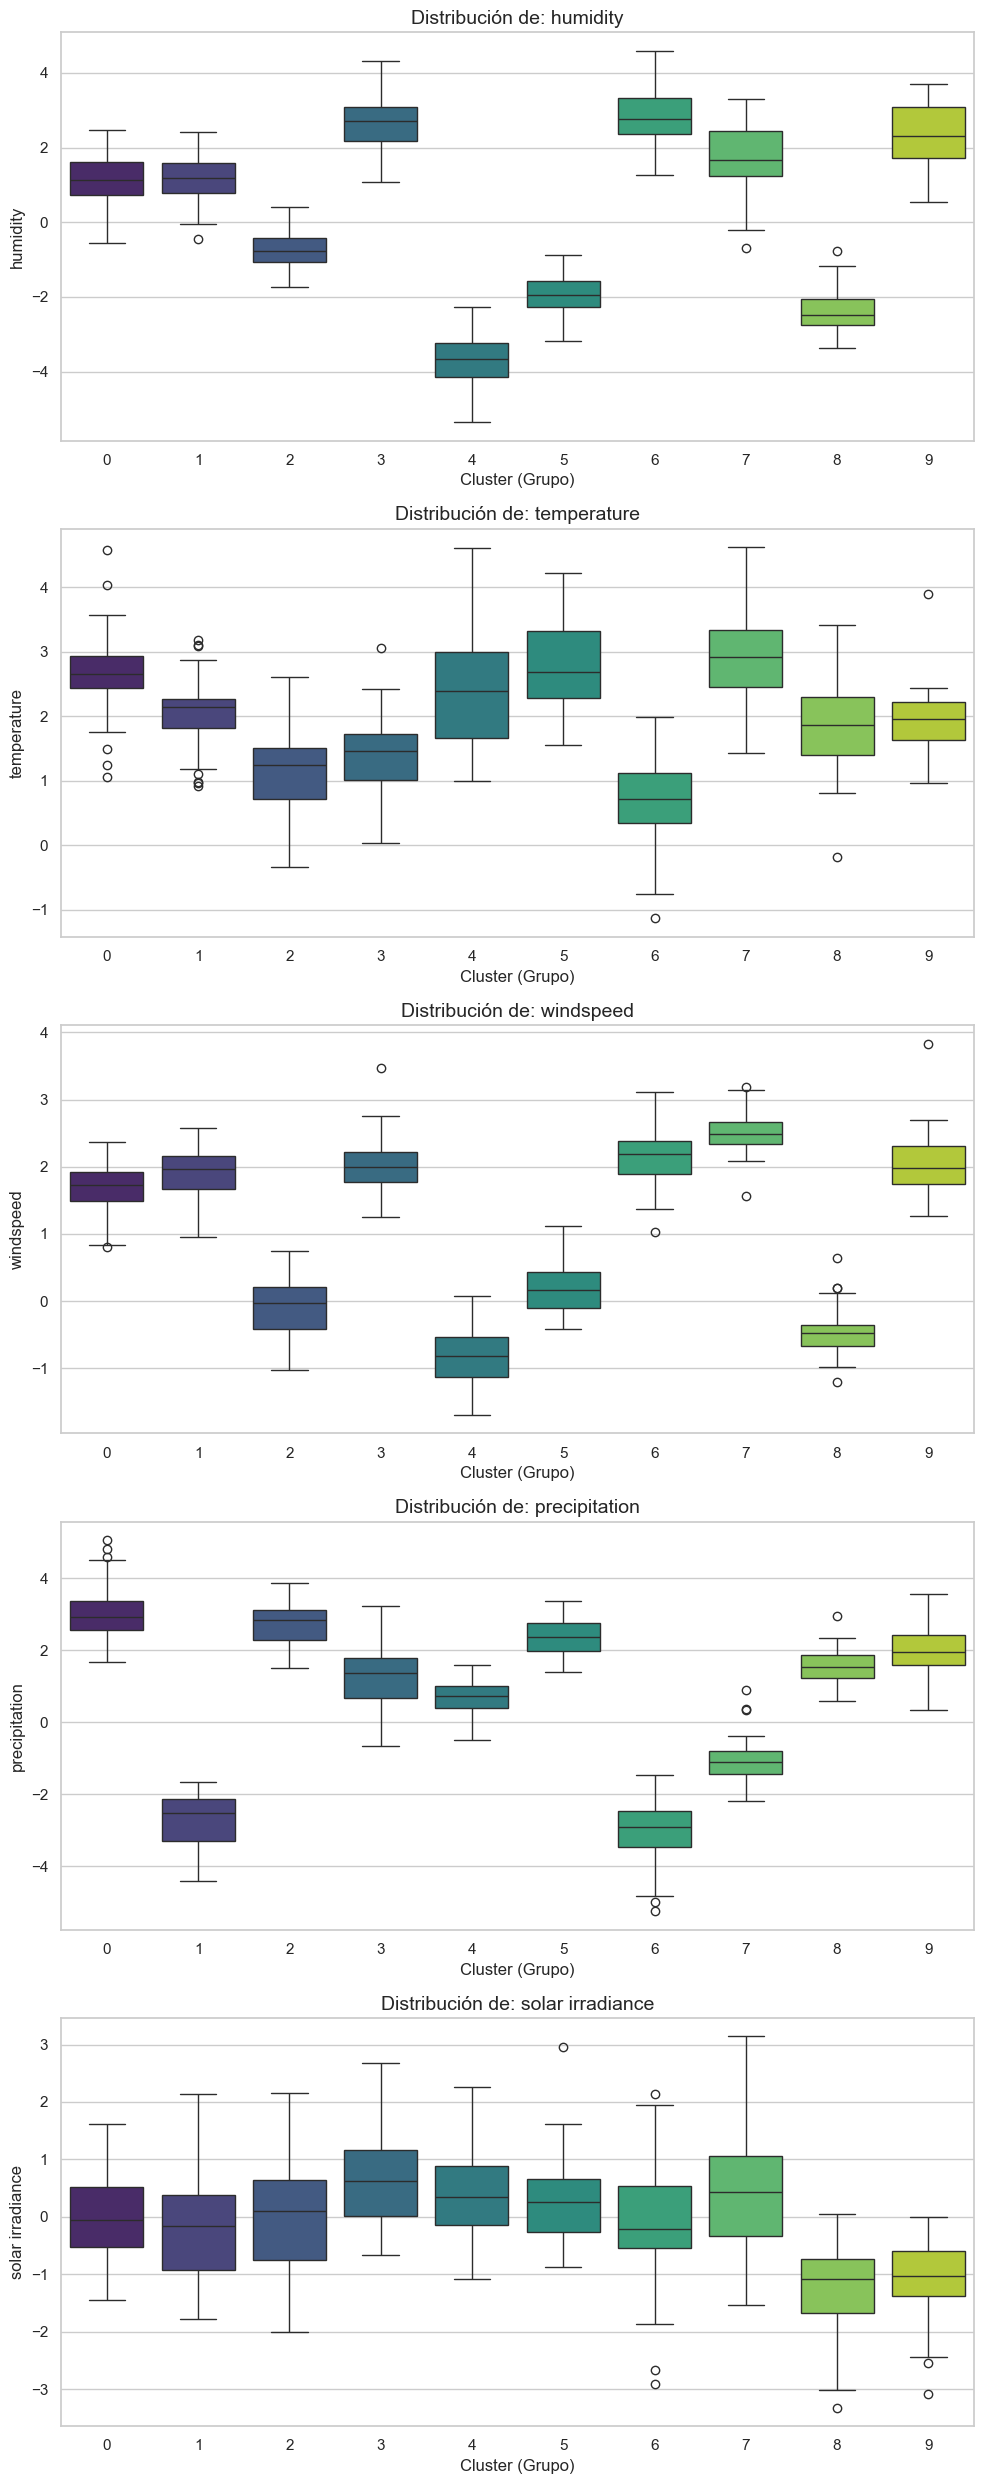

In [ ]:
""" Elige alguno de los resultados de los agrupamientos, analiza las distribuciones
de las columnas dentro de cada grupo y describe tus observaciones
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_analisis = X.copy()

df_analisis['Cluster'] = kmeans.labels_ 

resumen_clima = df_analisis.groupby('Cluster').mean()
    
print("--- Promedios por Tipo de Clima (Cluster) ---")
print(resumen_clima)

cols_numericas = df_analisis.select_dtypes(include=['float64', 'int64']).columns
cols_numericas = [c for c in cols_numericas if c != 'Cluster']

sns.set(style="whitegrid")
    
n_cols = len(cols_numericas)
fig, axes = plt.subplots(nrows=n_cols, ncols=1, figsize=(10, 5 * n_cols))

if n_cols == 1: axes = [axes]

for i, col in enumerate(cols_numericas):
    sns.boxplot(x='Cluster', y=col, data=df_analisis, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribución de: {col}', fontsize=14)
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Cluster (Grupo)')

plt.tight_layout()
plt.show()
   
   

# Análisis de Distribución de Variables por Clúster

Tras examinar los diagramas de caja (boxplots) de los 10 grupos generados, se observan perfiles meteorológicos claramente diferenciados. Dado que los valores en el eje Y indican datos estandarizados, se destacan las siguientes desviaciones respecto a la media:

### Observaciones Principales

* **Humedad:** Es una variable altamente discriminante. El **Cluster 4** se aísla por presentar una humedad extremadamente baja (ambiente seco), mientras que los **Clusters 3, 6 y 9** mantienen niveles consistentemente altos.
* **Temperatura:** El **Cluster 6** define claramente los días más fríos del conjunto de datos, con una mediana significativamente inferior al resto. En contraste, los **Clusters 5 y 7** agrupan los días con mayores temperaturas.
* **Velocidad del Viento:** El **Cluster 7** captura los días con mayor intensidad eólica, seguido por el Cluster 6. Por el contrario, los **Clusters 2 y 4** representan días de calma casi total.
* **Precipitación:** Se identifica al **Cluster 0** como el grupo de eventos de lluvia extrema. Los **Clusters 1 y 6**, a pesar de sus diferencias en temperatura, comparten niveles mínimos de precipitación.
* **Irradiancia Solar:** Los **Clusters 8 y 9** muestran una baja radiación solar, indicativo de días nublados, diferenciándose del **Cluster 7** que combina viento alto con alta exposición solar.

### Conclusión del Agrupamiento

El algoritmo ha logrado segmentar eficazmente condiciones climáticas opuestas. Se han identificado grupos específicos para **eventos extremos** (Cluster 0 para lluvias intensas, Cluster 4 para sequía extrema) y grupos que combinan factores complejos, como el Cluster 6 (frío y húmedo pero sin precipitación) o el Cluster 9 (húmedo, lluvioso y con poca luz).

Convergencia alcanzada en la iteración 5


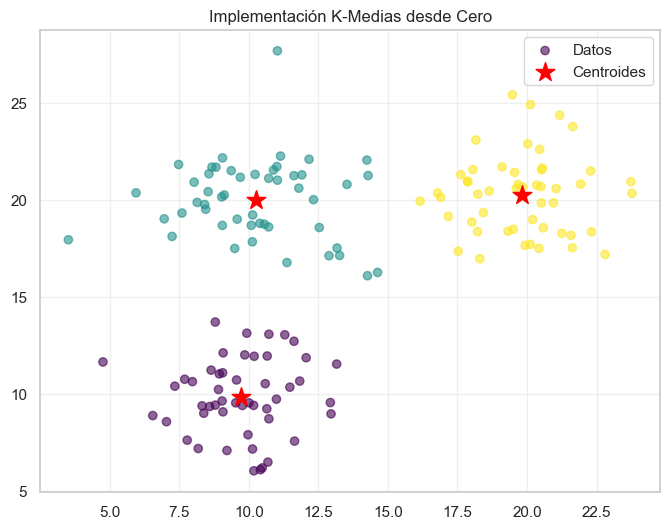

In [ ]:
""" 6. Tomando como base el código escrito en clase, realiza una implementación desde 
cero de K-Medias que cumpla con las cadenas de documentación: (15p)
"""
def k_medias(data, k, max_iters=100, tol=1e-4):
    """
    Implementación del algoritmo K-Medias 
    
    Parámetros:
    -----------
    data : numpy.ndarray
        Matriz de datos de forma (n_samples, n_features).
    k : int
        Número de grupos (clusters) a formar.
    max_iters : int, opcional (default=100)
        Número máximo de iteraciones si no converge antes.
    tol : float, opcional (default=1e-4)
        Tolerancia para declarar convergencia (cambio mínimo en centroides).
        
    Retorna:
    --------
    centroides : numpy.ndarray
        Ubicación final de los centroides de forma (k, n_features).
    grupos : numpy.ndarray
        Array de forma (n_samples,) con el índice del grupo asignado a cada muestra.
    """
    
    # Inicialización de Centroides
    indices_random = np.random.choice(len(data), k, replace=False)
    C = data[indices_random].astype(float) # Centroides iniciales
    
    # Inicializamos el vector de grupos
    grupos = np.zeros(len(data))
    
    # Función auxiliar de distancia
    def dist(a, b, axis=1):
        return np.linalg.norm(a - b, axis=axis)

    for i_iter in range(max_iters):
        # Guardamos una copia de los centroides antiguos para checar convergencia
        C_antiguos = C.copy()
        
        
        # Asignación de cada muestra a un grupo 
       
        for i in range(len(data)):
            # Calculamos distancia de la muestra 'i' a todos los centroides 'C'
            distancia = dist(data[i], C)
            # Asignamos el grupo correspondiente a la distancia mínima
            grupo = np.argmin(distancia)
            grupos[i] = grupo

       
        # Recalcular centroides (CÓDIGO DE CLASE)
        for i in range(k):
            # Filtramos los puntos que pertenecen al grupo 'i'
            puntos = np.array([data[j] for j in range(len(data)) if grupos[j] == i])
            
            # Si el grupo tiene puntos, calculamos el nuevo promedio
            if len(puntos) > 0:
                C[i] = np.mean(puntos, axis=0)
        

        # Verificación de Convergencia
        # Si la diferencia entre los centroides nuevos y antiguos es menor a la tolerancia
        cambio = dist(C, C_antiguos, axis=None) # axis=None para norma de toda la matriz
        if cambio < tol:
            print(f"Convergencia alcanzada en la iteración {i_iter}")
            break
            
    return C, grupos

# BLOQUE DE PRUEBA

np.random.seed(42)
# Nube 1
nube1 = np.random.normal(loc=[10, 10], scale=2, size=(50, 2))
# Nube 2
nube2 = np.random.normal(loc=[20, 20], scale=2, size=(50, 2))
# Nube 3
nube3 = np.random.normal(loc=[10, 20], scale=2, size=(50, 2))

datos_prueba = np.vstack([nube1, nube2, nube3])


K = 3
centroides_finales, etiquetas = k_medias(datos_prueba, K)


plt.figure(figsize=(8, 6))
plt.scatter(datos_prueba[:, 0], datos_prueba[:, 1], c=etiquetas, cmap='viridis', alpha=0.6, label='Datos')
plt.scatter(centroides_finales[:, 0], centroides_finales[:, 1], marker='*', c='red', s=200, label='Centroides')

plt.title('Implementación K-Medias desde Cero')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Datos cargados: (3000, 3)
Ejecutando K-Medias con k=3...
Convergencia alcanzada en la iteración 21


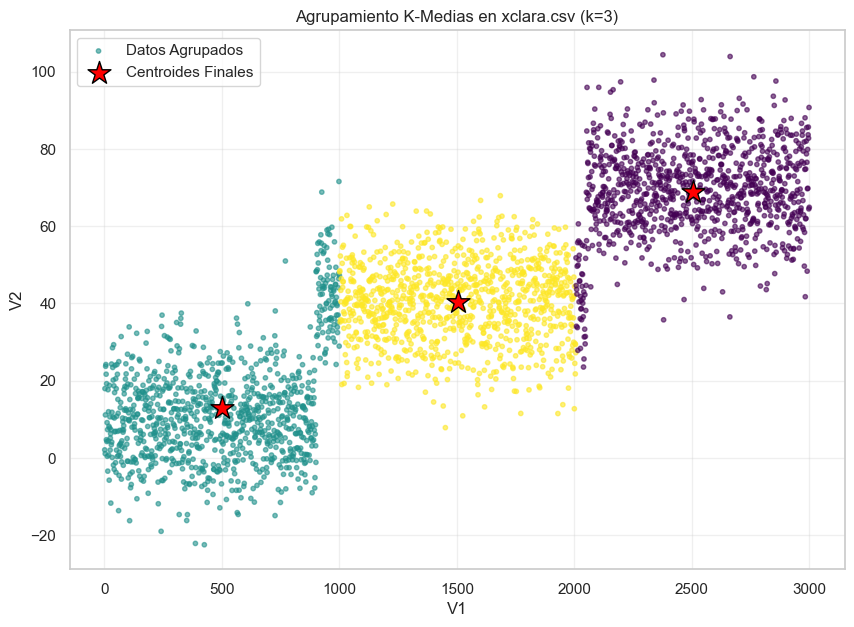

In [ ]:
"""Aplica tu versión de KMeans_ al conjunto de datos 'xclara.csv' y muestra
una gráfica con los grupos y centroides finales
"""
df = pd.read_csv('xclara.csv')
    
# Convertimos a NumPy array (necesario para nuestra función)
# xclara suele tener columnas V1 y V2, tomamos los valores directos
X = df.values 
    
print(f"Datos cargados: {X.shape}")

    
# EJECUCIÓN DEL ALGORITMO
   
# Para xclara, el número ideal de clusters visualmente es 3
K_OBJETIVO = 3
    
print(f"Ejecutando K-Medias con k={K_OBJETIVO}...")
centroides, etiquetas = k_medias(X, K_OBJETIVO)

plt.figure(figsize=(10, 7))
    
# a) Graficar los puntos de datos coloreados por su grupo
plt.scatter(X[:, 0], X[:, 1], c=etiquetas, cmap='viridis', s=10, alpha=0.6, label='Datos Agrupados')
    
# b) Graficar los centroides finales
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='*', s=300, edgecolor='black', label='Centroides Finales')
    
plt.title(f'Agrupamiento K-Medias en xclara.csv (k={K_OBJETIVO})')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



### Diagnóstico: Problema de Escalamiento de Variables

El fenómeno de las "fronteras verticales" observadas en el clúster amarillo es un artefacto derivado de la **disparidad de escalas** entre las variables. Dado que el rango de `V1` (0-3000) es drásticamente superior al de `V2` (-20 a 100), el cálculo de la distancia euclidiana se sesga hacia la variable de mayor magnitud, volviendo estadísticamente irrelevante la variación en el eje vertical. Esto provoca que el algoritmo defina los grupos basándose casi exclusivamente en cortes horizontales rígidos; para corregirlo y obtener fronteras de decisión naturales que consideren ambas dimensiones, es indispensable **estandarizar los datos** (Z-score) antes del entrenamiento.

Datos estandarizados. Ahora ambas columnas pesan lo mismo.
Convergencia alcanzada en la iteración 2


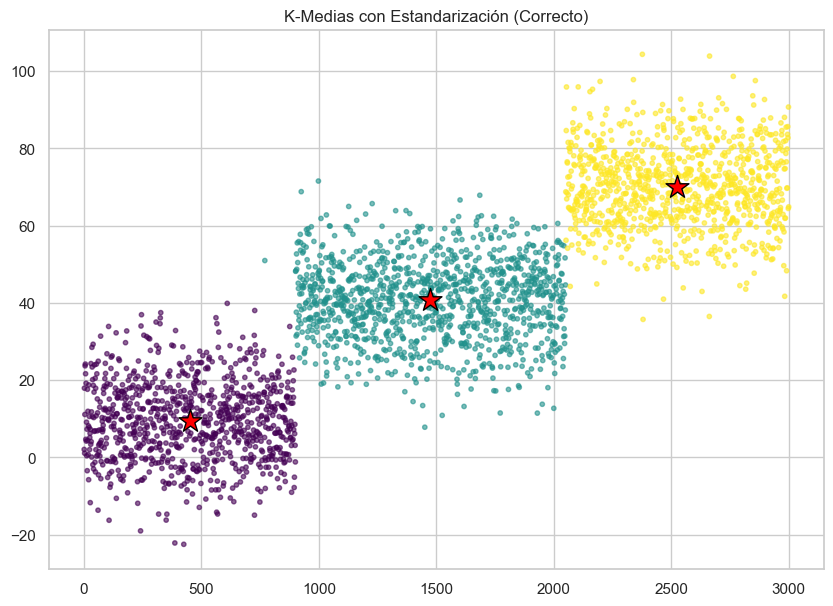

In [ ]:
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('xclara.csv')
X_raw = df.values 

# ESTANDARIZACIÓN 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

print("Datos estandarizados. Ahora ambas columnas pesan lo mismo.")

# Ejecutamos K-Medias con los datos escalados
K_OBJETIVO = 3
centroides_scaled, etiquetas = k_medias(X_scaled, K_OBJETIVO)

centroides_real = scaler.inverse_transform(centroides_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_raw[:, 0], X_raw[:, 1], c=etiquetas, cmap='viridis', s=10, alpha=0.6)
plt.scatter(centroides_real[:, 0], centroides_real[:, 1], c='red', marker='*', s=300, edgecolor='black')
plt.title('K-Medias con Estandarización (Correcto)')
plt.show()


# Análisis de asociaciones (10p)

In [ ]:
""" 7. Importa el conjunto de datos 'groceriesx.csv', y realiza el preprocesamiento
necesario para hacer análisis de asociaciones
"""
import pandas as pd
import csv
from mlxtend.preprocessing import TransactionEncoder


# Usamos el módulo 'csv' porque maneja filas de diferente longitud automáticamente
transacciones = []
with open('groceriesx.csv', mode='r') as f:
    reader = csv.reader(f, delimiter=',') 
    for row in reader:
        transacciones.append(row)


# Convertimos la lista de listas en una matriz binaria (True/False)
te = TransactionEncoder()
te_ary = te.fit(transacciones).transform(transacciones)

# Creamos el DataFrame final
df_asociaciones = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Transacciones procesadas: {len(transacciones)}")
print("Forma de la matriz binaria:", df_asociaciones.shape)
print(df_asociaciones.head())

Transacciones procesadas: 9836
Forma de la matriz binaria: (9836, 170)
   Instant food products  Transaction  UHT-milk  abrasive cleaner  \
0                  False         True     False             False   
1                  False        False     False             False   
2                  False        False     False             False   
3                  False        False     False             False   
4                  False        False     False             False   

   artif. sweetener  baby cosmetics  baby food   bags  baking powder  \
0             False           False      False  False          False   
1             False           False      False  False          False   
2             False           False      False  False          False   
3             False           False      False  False          False   
4             False           False      False  False          False   

   bathroom cleaner  ...  turkey  vinegar  waffles  whipped/sour cream  \
0      

In [31]:
""" Obtén los conjuntos de productos frecuentes con 3 elementos y soporte mayor a 0.01
después muestra las asociaciones que se obtienen con 'lift' como métrica
"""
from mlxtend.frequent_patterns import apriori, association_rules

# Calculamos todos los conjuntos con soporte > 0.01
frequent_itemsets = apriori(df_asociaciones, min_support=0.01, use_colnames=True)

# Agregamos una columna con la longitud del conjunto para poder filtrar
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Solo conjuntos con exactamente 3 productos
itemsets_tres_prod = frequent_itemsets[ (frequent_itemsets['length'] == 3) ]

print("--- Conjuntos frecuentes de 3 elementos (Soporte > 0.01) ---")
print(itemsets_tres_prod)

reglas = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Ordenamos por 'lift' descendente para ver las asociaciones más fuertes primero
reglas_ordenadas = reglas.sort_values(by="lift", ascending=False)

print("\n--- Top Reglas de Asociación (Ordenadas por Lift) ---")

# Mostramos columnas clave para facilitar la lectura
cols_ver = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
print(reglas_ordenadas[cols_ver].head(10))

--- Conjuntos frecuentes de 3 elementos (Soporte > 0.01) ---
      support                                           itemsets  length
301  0.010777      (bottled water, other vegetables, whole milk)       3
302  0.011488             (butter, other vegetables, whole milk)       3
303  0.010370  (other vegetables, root vegetables, citrus fruit)       3
304  0.013013       (other vegetables, whole milk, citrus fruit)       3
305  0.010268                 (yogurt, whole milk, citrus fruit)       3
306  0.010065                         (yogurt, whole milk, curd)       3
307  0.012302      (other vegetables, whole milk, domestic eggs)       3
308  0.010472  (other vegetables, whole milk, fruit/vegetable...       3
309  0.010573             (pastry, other vegetables, whole milk)       3
310  0.013522          (pip fruit, other vegetables, whole milk)       3
311  0.010167               (pork, other vegetables, whole milk)       3
312  0.012200    (root vegetables, other vegetables, rolls/buns

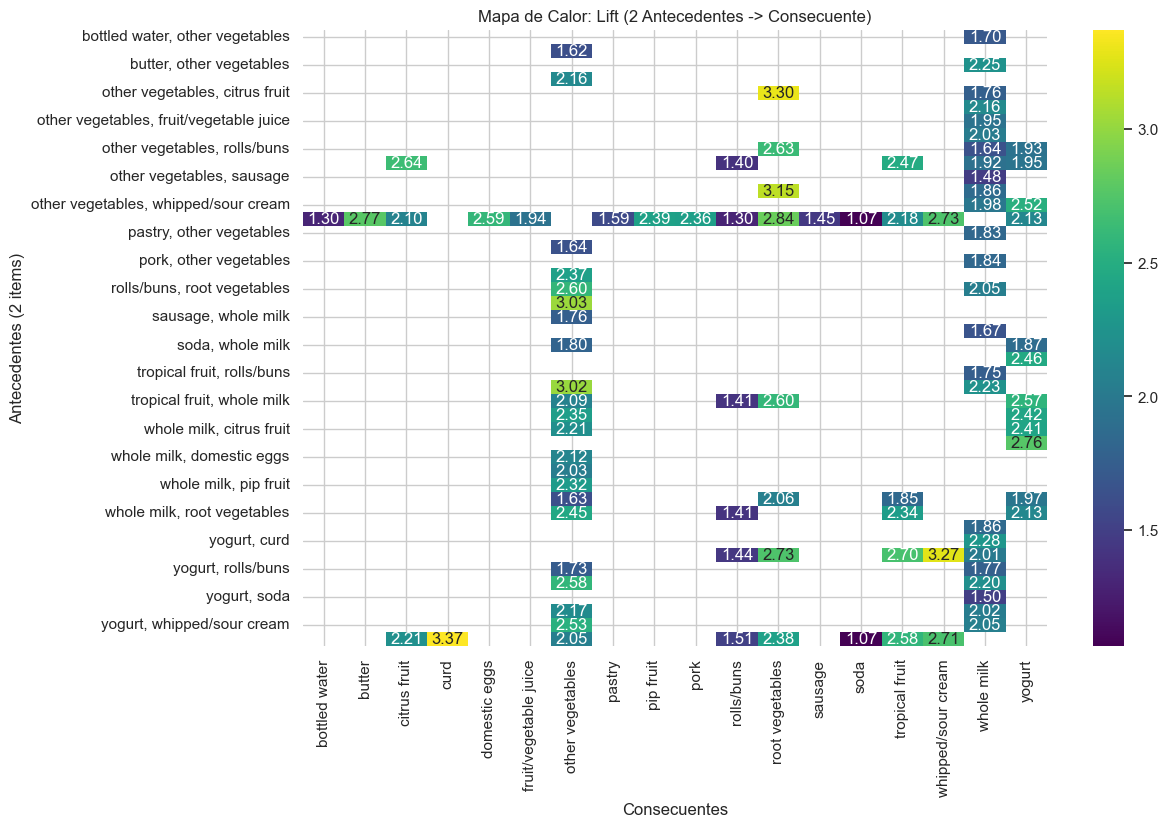

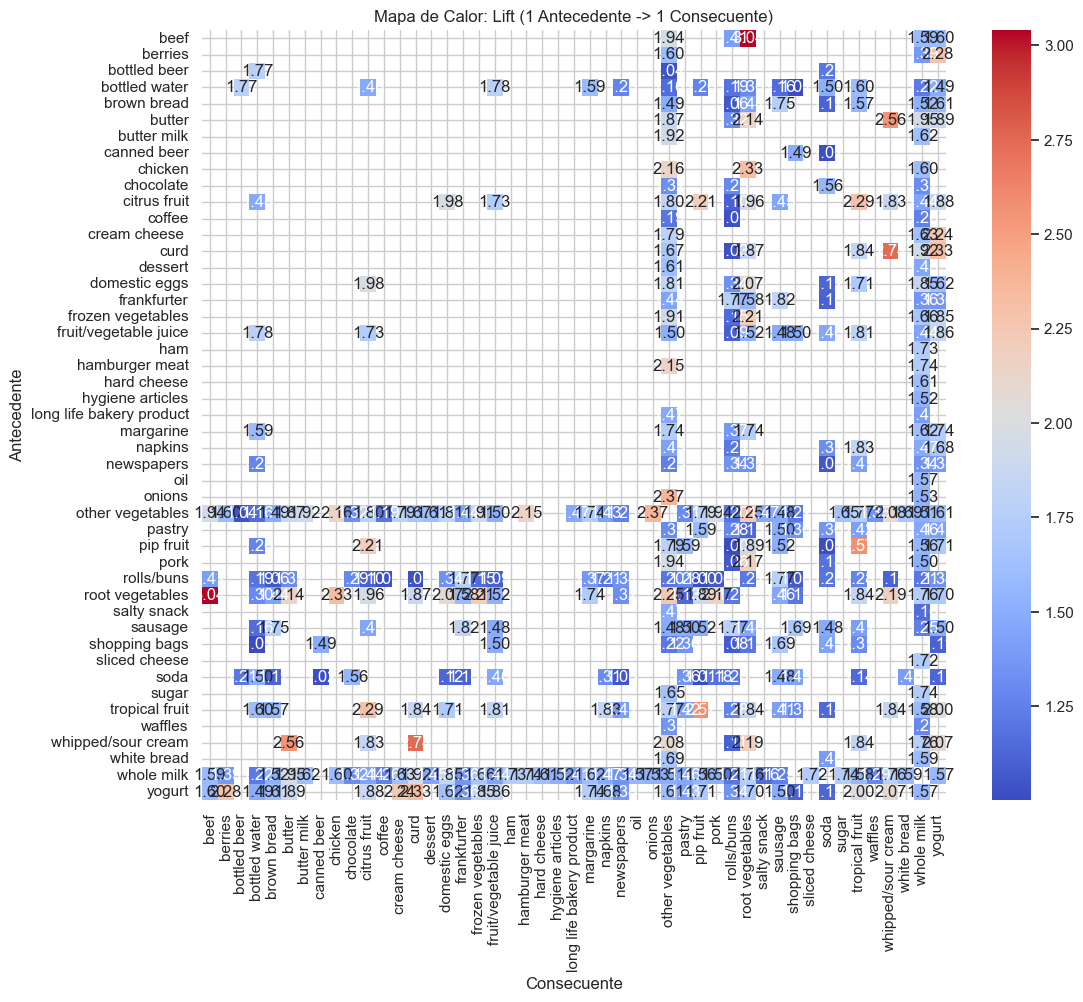

In [32]:
""" Muestra las asociaciones en dos mapas de calor con el valor 'lift':
en el primero muestra las reglas con dos antecedentes y en el segundo las
reglas con un valor tanto en antecedente como consecuente
"""


# Convertimos los frozensets a strings para poder graficarlos
reglas['ant_str'] = reglas['antecedents'].apply(lambda x: ', '.join(list(x)))
reglas['con_str'] = reglas['consequents'].apply(lambda x: ', '.join(list(x)))


# Filtramos: Antecedentes = 2 items
reglas_2_ant = reglas[reglas['antecedents'].apply(lambda x: len(x) == 2)]

# Creamos la matriz pivote (Eje Y: Antecedentes, Eje X: Consecuentes, Valor: Lift)
pivot_table_1 = reglas_2_ant.pivot(index='ant_str', columns='con_str', values='lift')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_1, annot=True, cmap="viridis", fmt=".2f")
plt.title('Mapa de Calor: Lift (2 Antecedentes -> Consecuente)')
plt.ylabel('Antecedentes (2 items)')
plt.xlabel('Consecuentes')
plt.show()


# Antecedentes = 1 item Y Consecuentes = 1 item
reglas_1_1 = reglas[
    (reglas['antecedents'].apply(lambda x: len(x) == 1)) & 
    (reglas['consequents'].apply(lambda x: len(x) == 1))
]

# Creamos la matriz pivote
pivot_table_2 = reglas_1_1.pivot(index='ant_str', columns='con_str', values='lift')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table_2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Mapa de Calor: Lift (1 Antecedente -> 1 Consecuente)')
plt.ylabel('Antecedente')
plt.xlabel('Consecuente')
plt.show()

# Series de tiempo (20p)

--- Rango de Fechas ---
Inicio: 1750-01-01 00:00:00
Fin:    2015-12-01 00:00:00

--- Primeras filas ---
            LandAverageTemperature  LandAverageTemperatureUncertainty  \
dt                                                                      
1750-01-01                   3.034                              3.574   
1750-02-01                   3.083                              3.702   
1750-03-01                   5.626                              3.076   
1750-04-01                   8.490                              2.451   
1750-05-01                  11.573                              2.072   

            LandMaxTemperature  LandMaxTemperatureUncertainty  \
dt                                                              
1750-01-01                 NaN                            NaN   
1750-02-01                 NaN                            NaN   
1750-03-01                 NaN                            NaN   
1750-04-01                 NaN                            N

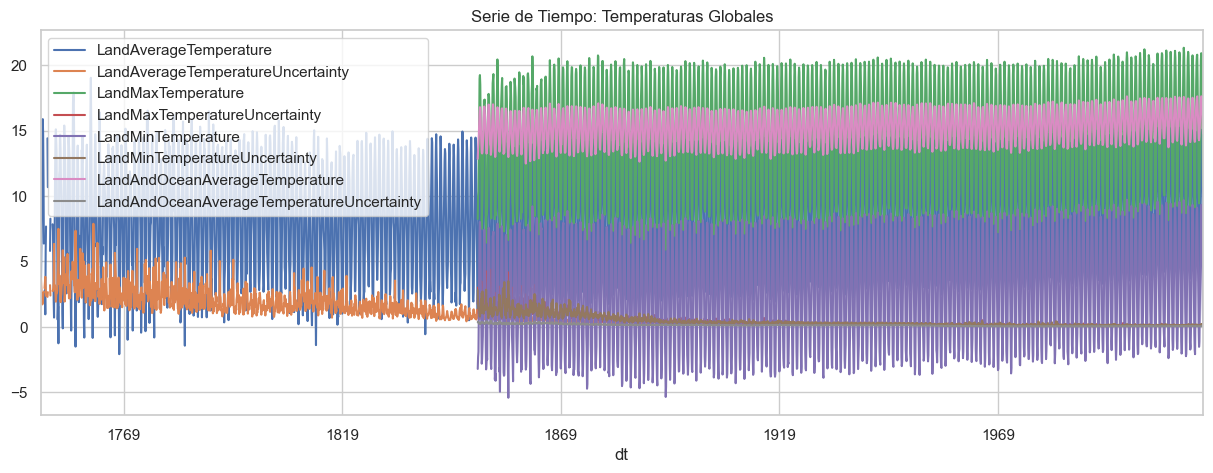

In [35]:
""" 8. Importa el conjunto de datos 'global_temperatures_tsa.csv', para realizar
análisis de series de tiempo
"""
df_tsa = pd.read_csv('global_temperatures_tsa.csv', parse_dates=[0], index_col=0)

# ORDENAMIENTO 
df_tsa.sort_index(inplace=True)

print("--- Rango de Fechas ---")
print(f"Inicio: {df_tsa.index.min()}")
print(f"Fin:    {df_tsa.index.max()}")
print("\n--- Primeras filas ---")
print(df_tsa.head())

df_tsa.plot(figsize=(15, 5), title='Serie de Tiempo: Temperaturas Globales')
plt.show()

In [36]:
""" Revisa el uso de [::n] para elegir los elementos cada 12 meses
"""
# Aplicamos el slicing para tomar un dato cada 12 pasos (meses)
# Esto crea una vista con la temperatura de Enero de cada año (asumiendo que empieza en Enero)
df_anual_sample = df_tsa[::12]

print(f"Filas originales: {len(df_tsa)}")
print(f"Filas tras slicing [::12]: {len(df_anual_sample)}")

print("\n--- Primeras filas del submuestreo (Cada 12 meses) ---")
print(df_anual_sample.head())



Filas originales: 3192
Filas tras slicing [::12]: 266

--- Primeras filas del submuestreo (Cada 12 meses) ---
            LandAverageTemperature  LandAverageTemperatureUncertainty  \
dt                                                                      
1750-01-01                   3.034                              3.574   
1751-01-01                   2.495                              3.469   
1752-01-01                   0.348                              3.789   
1753-01-01                   2.039                              3.478   
1754-01-01                   1.574                              5.020   

            LandMaxTemperature  LandMaxTemperatureUncertainty  \
dt                                                              
1750-01-01                 NaN                            NaN   
1751-01-01                 NaN                            NaN   
1752-01-01                 NaN                            NaN   
1753-01-01                 NaN                       

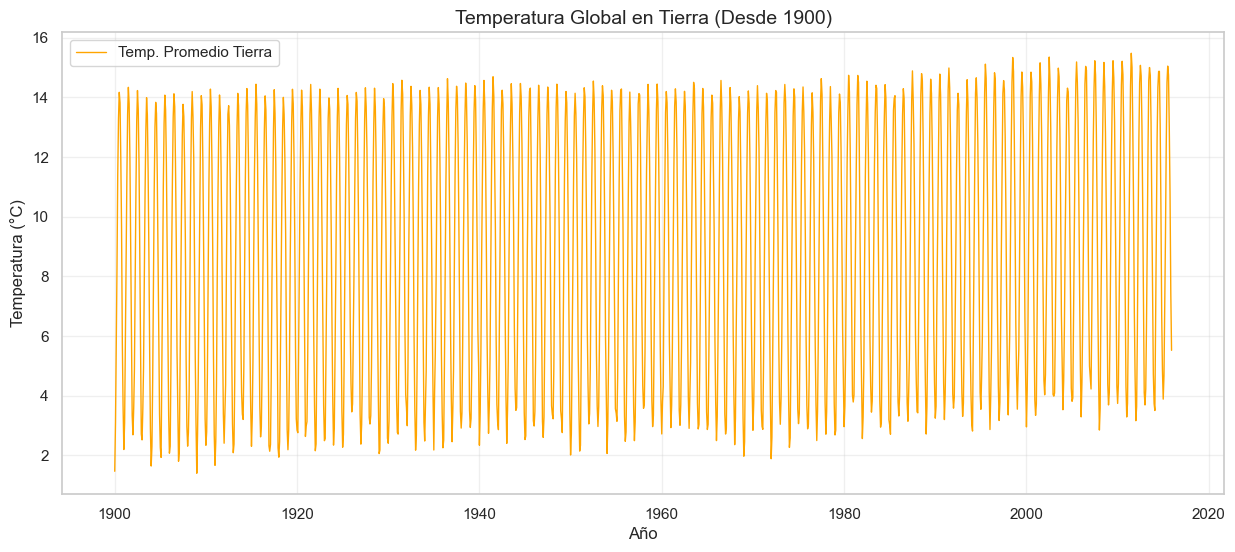

In [37]:
"""Conserva solamente las muestras a partir del siglo XX, grafica como serie de
tiempo la columna de temperatura en tierra
"""
df_siglo_xx = df_tsa.loc['1900':]

# GRAFICAR SERIE DE TIEMPO
plt.figure(figsize=(15, 6))

# Graficamos la temperatura promedio en tierra
plt.plot(df_siglo_xx.index, df_siglo_xx['LandAverageTemperature'], 
         label='Temp. Promedio Tierra', color='orange', linewidth=1)

plt.title('Temperatura Global en Tierra (Desde 1900)', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Autocorrelación a 1 mes (Lag 1): 0.8638
Autocorrelación a 1 año  (Lag 12): 0.9944


<Figure size 1200x600 with 0 Axes>

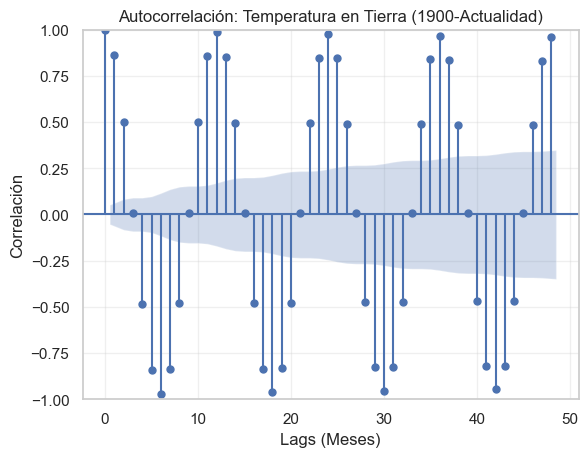

In [40]:
"""Obtén la autocorrelación de la misma columna"""
from statsmodels.graphics.tsaplots import plot_acf
# Seleccionamos la columna de interés
columna_temp = df_siglo_xx['LandAverageTemperature']

# Nos dice qué tanto depende la temperatura de hoy con la del mes pasado.
ac_lag1 = columna_temp.autocorr(lag=1)
ac_lag12 = columna_temp.autocorr(lag=12) # Si son datos mensuales, Lag 12 es el mismo mes del año pasado

print(f"Autocorrelación a 1 mes (Lag 1): {ac_lag1:.4f}")
print(f"Autocorrelación a 1 año  (Lag 12): {ac_lag12:.4f}")

# Muestra la correlación para múltiples lags simultáneamente.
plt.figure(figsize=(12, 6))

# lags=48 mostrará la relación de los últimos 4 años (si los datos son mensuales)
plot_acf(columna_temp, lags=48, title='Autocorrelación: Temperatura en Tierra (1900-Actualidad)')
plt.xlabel('Lags (Meses)')
plt.ylabel('Correlación')
plt.grid(True, alpha=0.3)
plt.show()

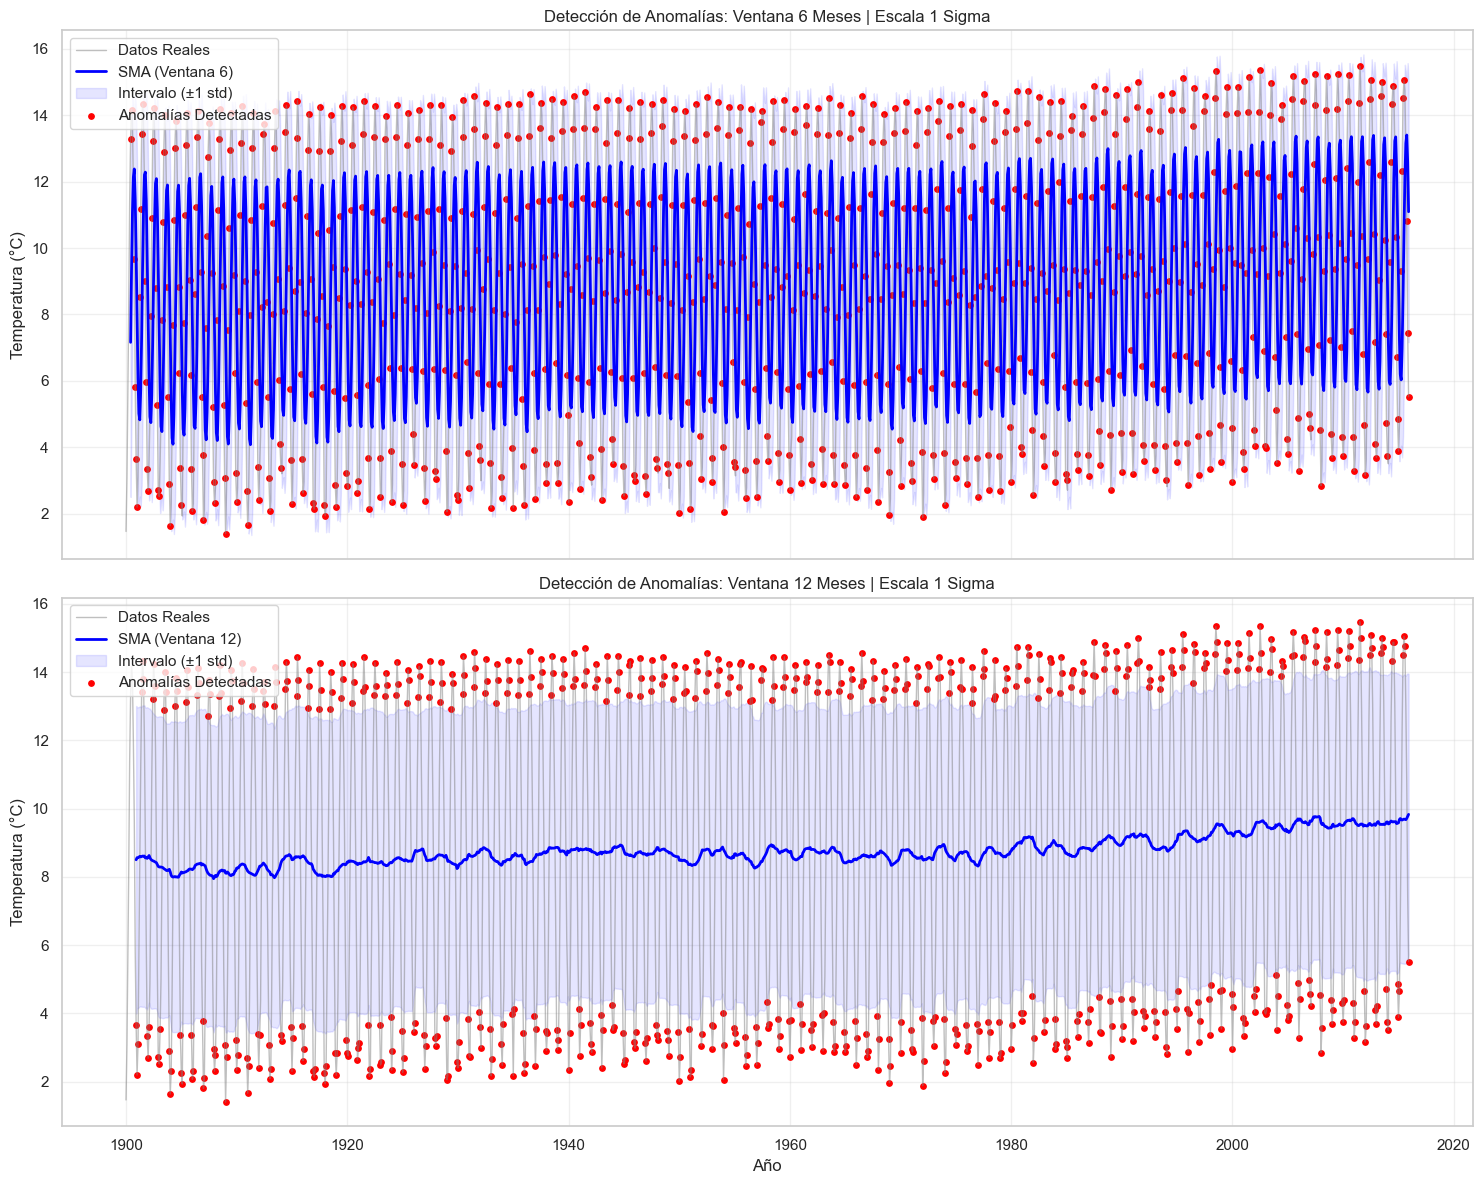

In [ ]:
"""Grafica la media móvil simple de la columna incluyendo los intervalos de
confianza y las anomalías con escala = 1; tamaño de ventana 6 y 12
"""

data = df_siglo_xx['LandAverageTemperature']

scale = 1
ventanas = [6, 12]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12), sharex=True)

for i, window in enumerate(ventanas):
    # Calcular Media Móvil (SMA) y Desviación Estándar Móvil
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    
    # Calcular Bandas (Intervalos)
    upper_bond = rolling_mean + (scale * rolling_std)
    lower_bond = rolling_mean - (scale * rolling_std)
    
    #  Identificar Anomalías
    # Son puntos donde el valor real es mayor al límite superior O menor al inferior
    anomalies = data[(data > upper_bond) | (data < lower_bond)]
    
    # Graficar
    ax = axes[i]
    
    # a) Datos originales (gris claro de fondo)
    ax.plot(data.index, data, label='Datos Reales', color='gray', alpha=0.5, linewidth=1)
    
    # b) Media Móvil
    ax.plot(rolling_mean.index, rolling_mean, label=f'SMA (Ventana {window})', color='blue', linewidth=2)
    
    # c) Intervalo de Confianza (Bandas)
    ax.fill_between(rolling_mean.index, lower_bond, upper_bond, color='blue', alpha=0.1, label=f'Intervalo (±{scale} std)')
    
    # d) Anomalías
    ax.scatter(anomalies.index, anomalies, color='red', s=15, label='Anomalías Detectadas')
    
    ax.set_title(f'Detección de Anomalías: Ventana {window} Meses | Escala {scale} Sigma')
    ax.set_ylabel('Temperatura (°C)')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left')

plt.xlabel('Año')
plt.tight_layout()
plt.show()

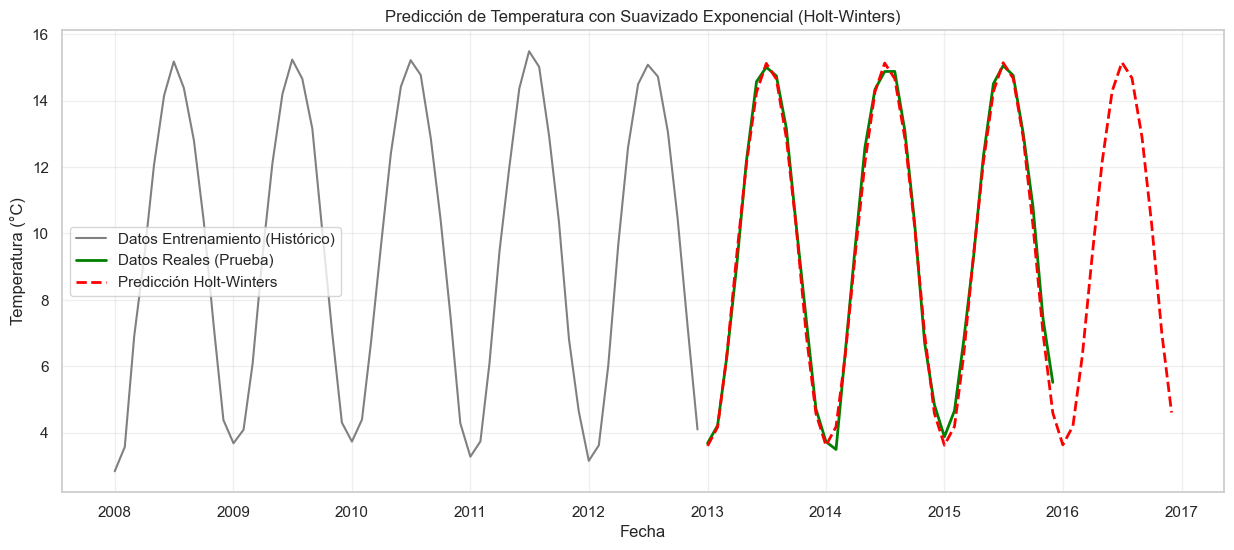

Error Medio Absoluto (MAE) en el conjunto de prueba: 0.2444 °C


In [43]:
"""Con ayuda de algún modelo exponencial realiza la predicción de cierto
número de valores, mostrando tanto los datos reales como la predicción obtenida
por el modelo
"""
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Aseguramos que la frecuencia del índice sea mensual ('MS' = Month Start)
# Esto es necesario para que statsmodels entienda los periodos.
data = df_siglo_xx['LandAverageTemperature'].asfreq('MS')

# Dividimos en Entrenamiento y Prueba
# Usaremos los últimos 3 años (36 meses) para probar el modelo
n_test = 36
train_data = data.iloc[:-n_test]
test_data = data.iloc[-n_test:]


# seasonal_periods=12: Porque los ciclos se repiten cada año
# trend='add' y seasonal='add': El calentamiento y las estaciones se suman al nivel base
modelo = ExponentialSmoothing(
    train_data, 
    seasonal_periods=12, 
    trend='add', 
    seasonal='add'
).fit()

# Predecimos el rango de prueba para comparar + 12 meses hacia el futuro desconocido
prediccion = modelo.forecast(steps=n_test + 12)

plt.figure(figsize=(15, 6))

# Graficamos solo los últimos años del entrenamiento para ver bien el detalle (ej. desde 2010)
plt.plot(train_data.index[-60:], train_data[-60:], label='Datos Entrenamiento (Histórico)', color='gray')
plt.plot(test_data.index, test_data, label='Datos Reales (Prueba)', color='green', linewidth=2)

# Graficamos la predicción (Línea punteada)
plt.plot(prediccion.index, prediccion, label='Predicción Holt-Winters', color='red', linestyle='--', linewidth=2)

plt.title('Predicción de Temperatura con Suavizado Exponencial (Holt-Winters)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. METRICA DE ERROR (Opcional pero recomendado)
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test_data, prediccion[:n_test])
print(f"Error Medio Absoluto (MAE) en el conjunto de prueba: {error:.4f} °C")

Entrenamiento: 963 muestras
Prueba (30%):  413 muestras
Coeficiente de Determinación (R^2): 0.8595


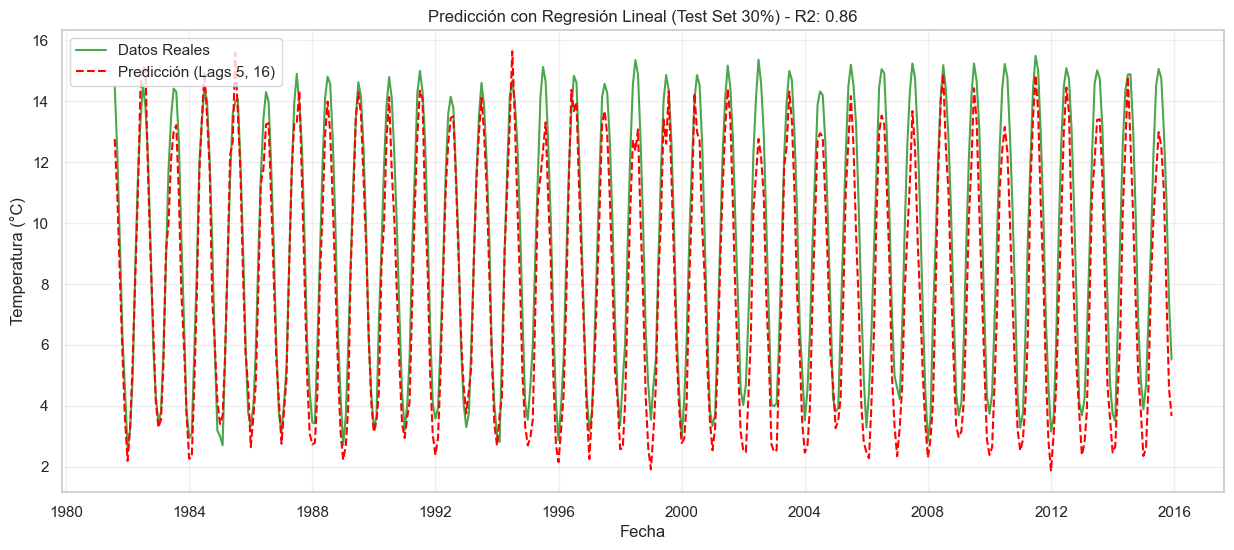

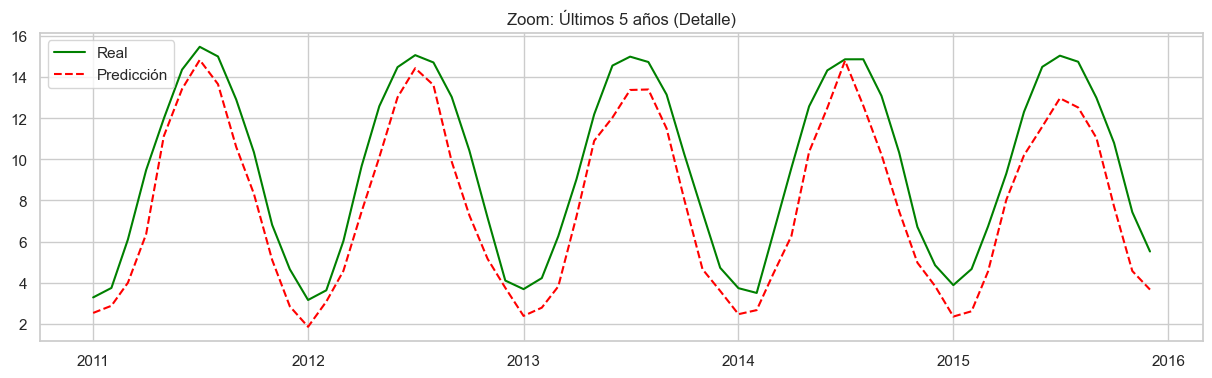

In [44]:
"""Con ayuda de algún modelo de regresión realiza la predicción del 30%
de los valores, mostrando tanto los datos reales como la predicción obtenida
por el modelo con retrasos (5, 16)
"""
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creamos un DataFrame temporal
df_reg = pd.DataFrame()
df_reg['Target'] = df_siglo_xx['LandAverageTemperature']

# Generamos los retrasos (Lags) solicitados: 5 y 16
df_reg['Lag_5'] = df_reg['Target'].shift(5)
df_reg['Lag_16'] = df_reg['Target'].shift(16)

# Eliminamos las filas con NaN (las primeras 16 filas quedarán vacías por el shift)
df_reg.dropna(inplace=True)

# En series de tiempo NO se debe mezclar aleatoriamente (shuffle=False), se corta secuencialmente.
test_size = 0.30
split_idx = int(len(df_reg) * (1 - test_size))

# Definimos X (Features) y y (Target)
X = df_reg[['Lag_5', 'Lag_16']]
y = df_reg['Target']

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"Entrenamiento: {len(X_train)} muestras")
print(f"Prueba (30%):  {len(X_test)} muestras")

# MODELADO (Regresión Lineal)
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R^2): {r2:.4f}")

plt.figure(figsize=(15, 6))

# Graficamos datos reales del conjunto de prueba
plt.plot(y_test.index, y_test, label='Datos Reales', color='green', alpha=0.7)

# Graficamos la predicción
plt.plot(y_test.index, y_pred, label=f'Predicción (Lags 5, 16)', color='red', linestyle='--', linewidth=1.5)

plt.title(f'Predicción con Regresión Lineal (Test Set 30%) - R2: {r2:.2f}')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico de Zoom (Opcional, para ver detalle de los últimos 5 años)
plt.figure(figsize=(15, 4))
plt.plot(y_test.index[-60:], y_test[-60:], label='Real', color='green')
plt.plot(y_test.index[-60:], y_pred[-60:], label='Predicción', color='red', linestyle='--')
plt.title('Zoom: Últimos 5 años (Detalle)')
plt.legend()
plt.show()

--- Tabla Comparativa (Primeras 10 muestras) ---
              Real  Prediccion     Error
dt                                      
1981-08-01  14.502   12.749305  1.752695
1981-09-01  12.236   10.889026  1.346974
1981-10-01   9.394    8.243694  1.150306
1981-11-01   6.273    5.674001  0.598999
1981-12-01   4.519    3.542981  0.976019
1982-01-01   2.558    2.192052  0.365948
1982-02-01   3.281    3.368385 -0.087385
1982-03-01   4.873    5.412216 -0.539216
1982-04-01   8.465    8.103887  0.361113
1982-05-01  11.348   10.799920  0.548080

--- Estadísticas del Error ---
count    413.000000
mean       1.244318
std        0.923134
min       -1.599177
25%        0.613008
50%        1.267572
75%        1.889855
max        3.617483
Name: Error, dtype: float64


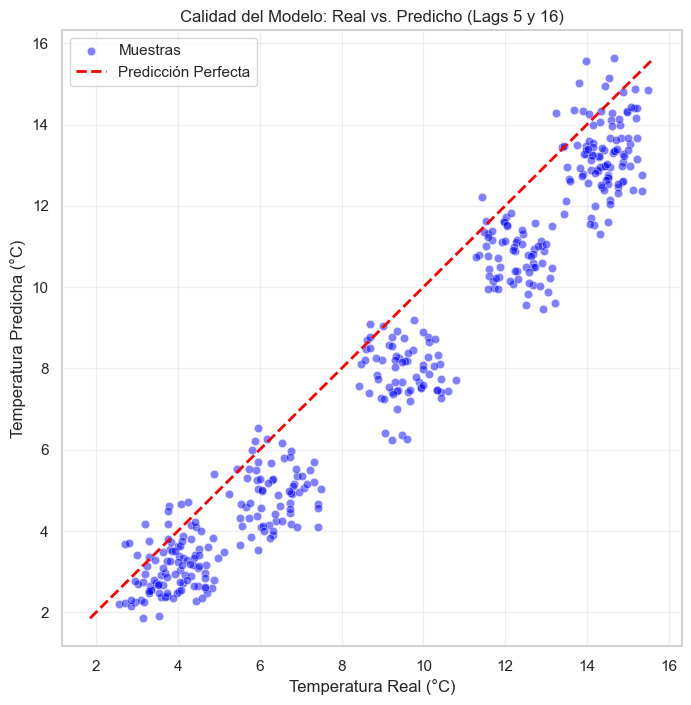

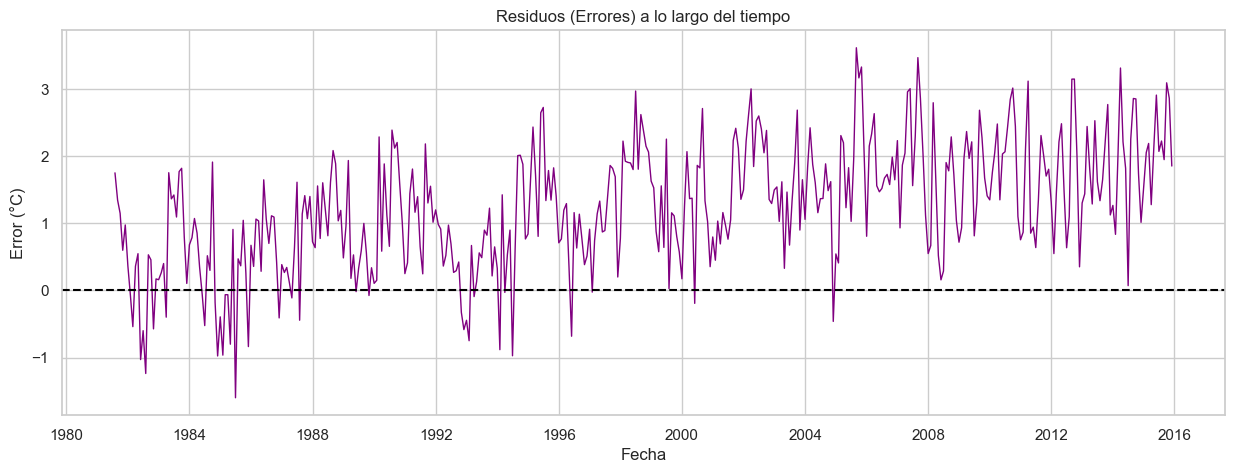

In [ ]:
"""Muestra los datos de prueba y el resultado de tu modelo de regresión
"""

# Unimos los valores reales y las predicciones en un solo DataFrame
df_resultados = pd.DataFrame({
    'Real': y_test.values,
    'Prediccion': y_pred,
    'Error': y_test.values - y_pred
}, index=y_test.index) # Mantenemos la fecha como índice

print("--- Tabla Comparativa (Primeras 10 muestras) ---")
print(df_resultados.head(10))

print("\n--- Estadísticas del Error ---")
print(df_resultados['Error'].describe())

plt.figure(figsize=(8, 8))

# Puntos de datos
sns.scatterplot(x='Real', y='Prediccion', data=df_resultados, alpha=0.5, color='blue', label='Muestras')

# Línea de Identidad (Donde la predicción sería perfecta: x = y)
min_val = min(df_resultados['Real'].min(), df_resultados['Prediccion'].min())
max_val = max(df_resultados['Real'].max(), df_resultados['Prediccion'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Predicción Perfecta')

plt.title('Calidad del Modelo: Real vs. Predicho (Lags 5 y 16)')
plt.xlabel('Temperatura Real (°C)')
plt.ylabel('Temperatura Predicha (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Nos ayuda a ver si el modelo falla más en alguna época específica
plt.figure(figsize=(15, 5))
plt.plot(df_resultados.index, df_resultados['Error'], color='purple', linewidth=1)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuos (Errores) a lo largo del tiempo')
plt.ylabel('Error (°C)')
plt.xlabel('Fecha')
plt.show()

*8.a Demuestra que a partir de $\widehat{\mu}_{n}=\sum_{t=\text{1}}^{n}w_{t}y_{t}$, se obtiene $\widehat{\mu}_{n}=\left(1-\alpha\right)^{n-t}\widehat{\mu}_{n-1}+\alpha y_{n}$*

# Demostración: De la Suma Ponderada a la Fórmula Recursiva (Suavizado Exponencial)

Queremos demostrar que la media estimada en el tiempo $n$ puede expresarse en función de la media anterior y la nueva observación.

### 1. Definición inicial
Partimos de la definición de la media suavizada como una suma ponderada de todas las observaciones pasadas hasta el momento $n$:

$$
\widehat{\mu}_{n} = \sum_{t=1}^{n} w_t y_t
$$

En el suavizado exponencial, los pesos $w_t$ se definen como:
$$
w_t = \alpha(1-\alpha)^{n-t}
$$

Por lo tanto, la ecuación expandida es:
$$
\widehat{\mu}_{n} = \sum_{t=1}^{n} \alpha(1-\alpha)^{n-t} y_t
$$

### 2. Separación del último término
Separamos el término actual ($t=n$) del resto de la suma ($t=1$ hasta $n-1$):

$$
\widehat{\mu}_{n} = \underbrace{\alpha(1-\alpha)^{n-n} y_n}_{\text{Término actual } (t=n)} + \underbrace{\sum_{t=1}^{n-1} \alpha(1-\alpha)^{n-t} y_t}_{\text{Términos anteriores}}
$$

Sabemos que $(1-\alpha)^0 = 1$, por lo que el primer término se simplifica a $\alpha y_n$:

$$
\widehat{\mu}_{n} = \alpha y_n + \sum_{t=1}^{n-1} \alpha(1-\alpha)^{n-t} y_t
$$

### 3. Factorización
Observamos la sumatoria restante. Podemos factorizar un término $(1-\alpha)$ de la expresión $(1-\alpha)^{n-t}$:

$$
\text{Nota: } (1-\alpha)^{n-t} = (1-\alpha) \cdot (1-\alpha)^{n-t-1}
$$

Sustituimos esto en la sumatoria:

$$
\widehat{\mu}_{n} = \alpha y_n + (1-\alpha) \sum_{t=1}^{n-1} \alpha(1-\alpha)^{n-t-1} y_t
$$

Observamos que el exponente $n-t-1$ es lo mismo que $(n-1)-t$.

$$
\widehat{\mu}_{n} = \alpha y_n + (1-\alpha) \underbrace{\sum_{t=1}^{n-1} \alpha(1-\alpha)^{(n-1)-t} y_t}_{\text{Esto es } \widehat{\mu}_{n-1}}
$$

### 4. Identificación de la media anterior ($\widehat{\mu}_{n-1}$)
La sumatoria que hemos aislado es exactamente la definición de la media suavizada para el paso anterior ($n-1$):

$$
\widehat{\mu}_{n-1} = \sum_{t=1}^{n-1} \alpha(1-\alpha)^{(n-1)-t} y_t
$$

### 5. Sustitución Final
Sustituimos $\widehat{\mu}_{n-1}$ en nuestra ecuación original:

$$
\widehat{\mu}_{n} = \alpha y_n + (1-\alpha)\widehat{\mu}_{n-1}
$$

O reordenando los términos para coincidir con la forma estándar de actualización:

$$
\widehat{\mu}_{n} = (1-\alpha)\widehat{\mu}_{n-1} + \alpha y_n
$$

**Q.E.D.**

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier 

df = pd.read_csv("cars.csv")
# Codificación de variables categóricas
df_encoded = df.copy()
for col in df.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])

X = df_encoded.drop(columns=['class']).values
y = df_encoded['class'].values

pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Definición de la Rejilla de Parámetros (2 parámetros)
param_grid_knn = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11],  # Número de vecinos
    'knn__weights': ['uniform', 'distance'],    # Peso: uniforme o basado en distancia
    'knn__metric': ['euclidean', 'manhattan']   # Extra: métrica de distancia
}

#  Búsqueda de Malla (GridSearch)
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X, y)

print("--- EJERCICIO 1: KNN (Cars) ---")
print("Mejores parámetros:", grid_knn.best_params_)
print(f"Mejor Accuracy: {grid_knn.best_score_:.4f}")

--- EJERCICIO 1: KNN (Cars) ---
Mejores parámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Mejor Accuracy: 0.8028


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso


diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', Ridge())  
])

param_grid = [
    {
        'reg': [Ridge()],
        'reg__alpha': [0.1, 1.0, 10.0]  
    },
    {
        'reg': [Lasso(max_iter=10000)],
        'reg__alpha': [0.01, 0.1, 1.0]  
    }
]


grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X, y)


print("Mejor modelo:", grid.best_params_['reg'])
print("Mejor alpha:", grid.best_params_['reg__alpha'])
print("Mejor R2 promedio (CV):", grid.best_score_)


Mejor modelo: Lasso(max_iter=10000)
Mejor alpha: 0.1
Mejor R2 promedio (CV): 0.4824625577013791
